<h1 align="center">Trabajo práctico integrador. <br> Análisis de datos.</h1>
<h4 align="center">Universidad de Buenos Aires.</h4>
<p align="right"> Por: Sevann Radhak Triztan. </p>

# 1. Introducción y motivación.

### 1.1. Dataset elegido.

Datos de distintas estaciones meteorológicas de Australia (weatherAus).
* Preguntas interesantes para considerar aquí: El objetivo es predecir si lloverá o no al día siguiente (variable RainTomorrow), en función datos meteorológicos del día actual.

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
data = pd.read_csv('./weatherAUS.csv')
PLOT = True

# 2. Análisis exploratorio inicial.

2.0. Definición de funciones.

### 2.1. Visualizar las primeras filas.

In [91]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01/12/2008   Albury     13.4     22.9       0.6          NaN       NaN   
1  02/12/2008   Albury      7.4     25.1       0.0          NaN       NaN   
2  03/12/2008   Albury     12.9     25.7       0.0          NaN       NaN   
3  04/12/2008   Albury      9.2     28.0       0.0          NaN       NaN   
4  05/12/2008   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

### 2.2. Realizar un resumen de 5 números.

In [7]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

### 2.3. Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).

In [12]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

#### Definición de Variables Categóricas.

In [51]:
def categorical_columns(df):
    return df.select_dtypes(include=['object']).columns

def print_categorical_columns(data):
    categorical = categorical_columns(data)
    null_counts = {col: data[col].isnull().sum() for col in categorical}
    sorted_columns = sorted(null_counts.items(), key=lambda x: x[1], reverse=True)
    
    print('Categorical columns:')
    for col, null_count in sorted_columns:      
        unique_values = list(data[col].unique())
        if len(unique_values) > 20:
            unique_values = unique_values[:20] + ['...'] 
        print(f'{col.ljust(15)} {null_count} {str('null values.').ljust(15)} \t {data[col].nunique()} unique values: \t {unique_values}')

In [52]:
print_categorical_columns(data)

Categorical columns:
WindDir9am      10566 null values.    	 16 unique values: 	 ['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N', 'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE']
WindGustDir     10326 null values.    	 16 unique values: 	 ['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE', 'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW']
WindDir3pm      4228 null values.    	 16 unique values: 	 ['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW', 'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE']
RainTomorrow    3267 null values.    	 2 unique values: 	 ['No', 'Yes', nan]
RainToday       3261 null values.    	 2 unique values: 	 ['No', 'Yes', nan]
Date            0 null values.    	 3436 unique values: 	 ['01/12/2008', '02/12/2008', '03/12/2008', '04/12/2008', '05/12/2008', '06/12/2008', '07/12/2008', '08/12/2008', '09/12/2008', '10/12/2008', '11/12/2008', '12/12/2008', '13/12/2008', '14/12/2008', '15/12/2008', '16/12/2008', '17/12/2008', '18/12/2008', '19/12/2008', '20

- **WindDir9am, WindGustDir, WindDir3pm:**  
Variables categóricas nominales que representan la dirección del viento en diferentes momentos del día.  
- **RainTomorrow, RainToday:**  
Variables categóricas binarias que indican si llovió hoy o si lloverá mañana. Son muy informativas para el presente problema de clasificación.  
- **Date, Location:**  
Variables categóricas nominales que representan, respectivamente, la fecha y la ubicación de la observación. Son las unicas variables que contienen la totalidad de la información, por lo que serán fundamentales para el análisis e interpretación de los datos.


#### Definición de Variables Numéricas:

In [53]:
def numerical_columns(df):
    return df.select_dtypes(include=['float64', 'int64']).columns

def print_numerical_columns(data):
    numerical = numerical_columns(data)
    null_counts = {col: data[col].isnull().sum() for col in numerical}
    sorted_columns = sorted(null_counts.items(), key=lambda x: x[1], reverse=True)
    
    print('Numerical columns:')
    for col, null_count in sorted_columns:
        print(f'{col} \t {null_count} null values.')

In [54]:
print_numerical_columns(data)

Numerical columns:
Sunshine 	 69835 null values.
Evaporation 	 62790 null values.
Cloud3pm 	 59358 null values.
Cloud9am 	 55888 null values.
Pressure9am 	 15065 null values.
Pressure3pm 	 15028 null values.
WindGustSpeed 	 10263 null values.
Humidity3pm 	 4507 null values.
Temp3pm 	 3609 null values.
Rainfall 	 3261 null values.
WindSpeed3pm 	 3062 null values.
Humidity9am 	 2654 null values.
WindSpeed9am 	 1767 null values.
Temp9am 	 1767 null values.
MinTemp 	 1485 null values.
MaxTemp 	 1261 null values.


- **Sunshine, Evaporation:**   
Variables numéricas continuas que representan diferentes aspectos del clima.
- **Cloud3pm, Cloud9am:**  
Variables numéricas discretas que representan la fraccion de cielo cubierto por nubes (en octavos) en diferentes momentos del día.  
- **Pressure9am, Pressure3pm:**  
Variables numéricas continuas que representan la presión atmosférica en diferentes momentos del día.
- **WindGustSpeed, WindSpeed3pm, WindSpeed9am:**  
Variables numéricas continuas que representan la velocidad del viento en diferentes momentos del día
- **Humidity3pm, Humidity9am:**  
Variables numéricas continuas que representan la humedad (en porcentaje %) para  diferentes momentos del día.
- **Temp3pm, Temp9am, MinTemp, MaxTemp:**  
Variables numéricas continuas que representan la temperatura en diferentes momentos del día y las temperaturas mínima y máxima. **MinTemp y MaxTemp** son variables significativamente representativas que, al poseer menor cantidad de valores faltantes, son un excelente punto de partida para nuestro análisis e imputación de los datos faltantes.
- **Rainfall:**  
Variable numérica continua que representa la cantidad de lluvia. Es muy informativa para entender e interpretar el comportamiento de otras variables en nuestro análisis.

### 2.4. Identificar las variables de entrada y de salida del problema.

In [ ]:
def prepare_data(data, target):
    input_variables = data.drop(target, axis=1)
    target_variable = data[target]
    variable_names = input_variables.columns.tolist()
    return variable_names, target_variable

# Call the function
variable_names, target_variable = prepare_data(data, 'RainTomorrow')

# Print the result
print("Input variables:")
print(variable_names)

In [62]:
def input_and_target_variables(data, target):
    input_variables = data.drop(target, axis=1)
    target_variable = data[target]
    return input_variables, target_variable

In [64]:
target = 'RainTomorrow'
input_variables, target_variable = input_and_target_variables(data, target)

In [72]:
print(f'Target variable: {target}')

Target variable: RainTomorrow


In [69]:
print('Input variables: ') 
input_variables.columns.tolist()

Input variables: 


['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

### 2.5 Variables de entrada:
Realizar los siguientes análisis por tipo de variable.

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def plot_histogram(df, column, ax):
    plot = sns.histplot(df[column], bins=50, ax=ax, kde=True, color='blue') 
    plot.get_lines()[0].set_color('red')  
    ax.set_xlabel(column, fontsize=18)
    ax.set_ylabel('Frequency', fontsize=18)

def print_statistics(df, column, ax=None):
    stats_text = f"""
    Mean: {df[column].mean():.2f}
    Median: {df[column].median():.2f}
    Mode: {df[column].mode()[0]:.2f}
    Std Dev: {df[column].std():.2f}
    Variance: {df[column].var():.2f}
    Skewness: {df[column].skew():.2f}
    Kurtosis: {df[column].kurt():.2f}
    """
    if ax is not None:
        ax.axis('off')
        ax.text(0.2, 0.5, stats_text, horizontalalignment='left', verticalalignment='center', fontsize=20)
    else:
        print(stats_text)

def draw_plots(df, column, axs):
    # Boxplot
    axs[1, 0].boxplot(df[column].dropna())
    axs[1, 0].set_title(f'Boxplot of {column}')

    # QQ-Plot
    stats.probplot(df[column].dropna(), dist="norm", plot=axs[1, 1])
    axs[1, 1].set_title(f'QQ-Plot of {column}')

def plot_histogram_and_statistics(df, columns, PLOT=False):
    for column in columns:
        print(f'Column: {column}')
        if PLOT:
            fig, axs = plt.subplots(2, 2, figsize=(15, 10))
            plot_histogram(df, column, axs[0, 0])
            print_statistics(df, column, axs[0, 1])
            draw_plots(df, column, axs)
            plt.tight_layout()
            plt.show()
        else:
            print_statistics(df, column)

#### **2.5.1. Numéricas:** Obtener conclusiones acerca de la distribución de los datos.

Column: MinTemp


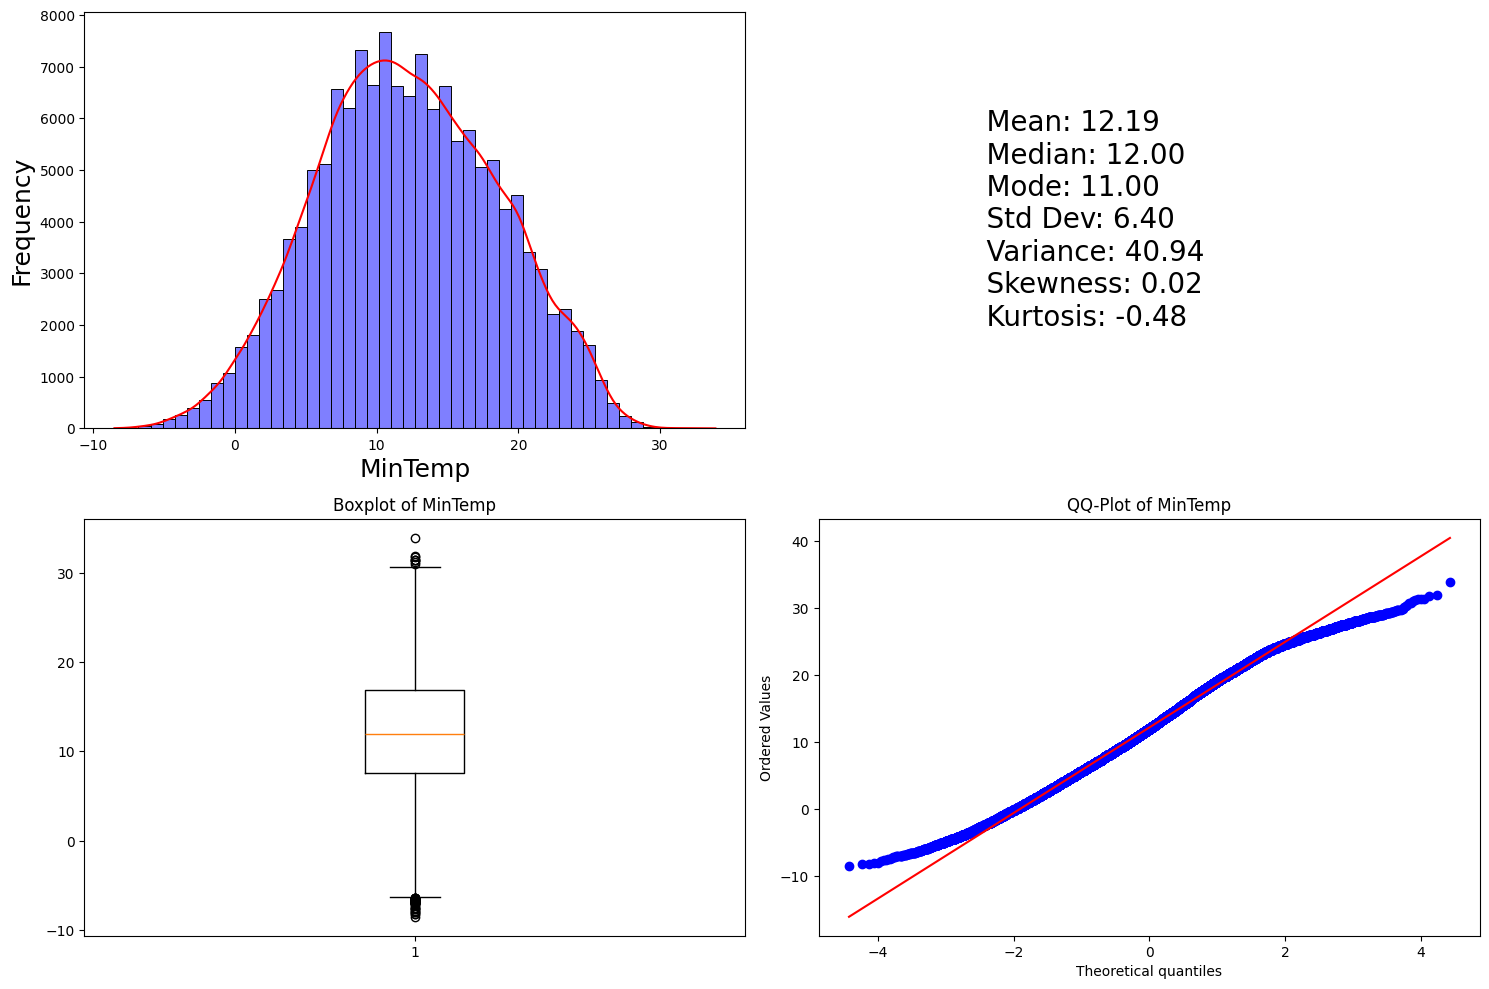

Column: MaxTemp


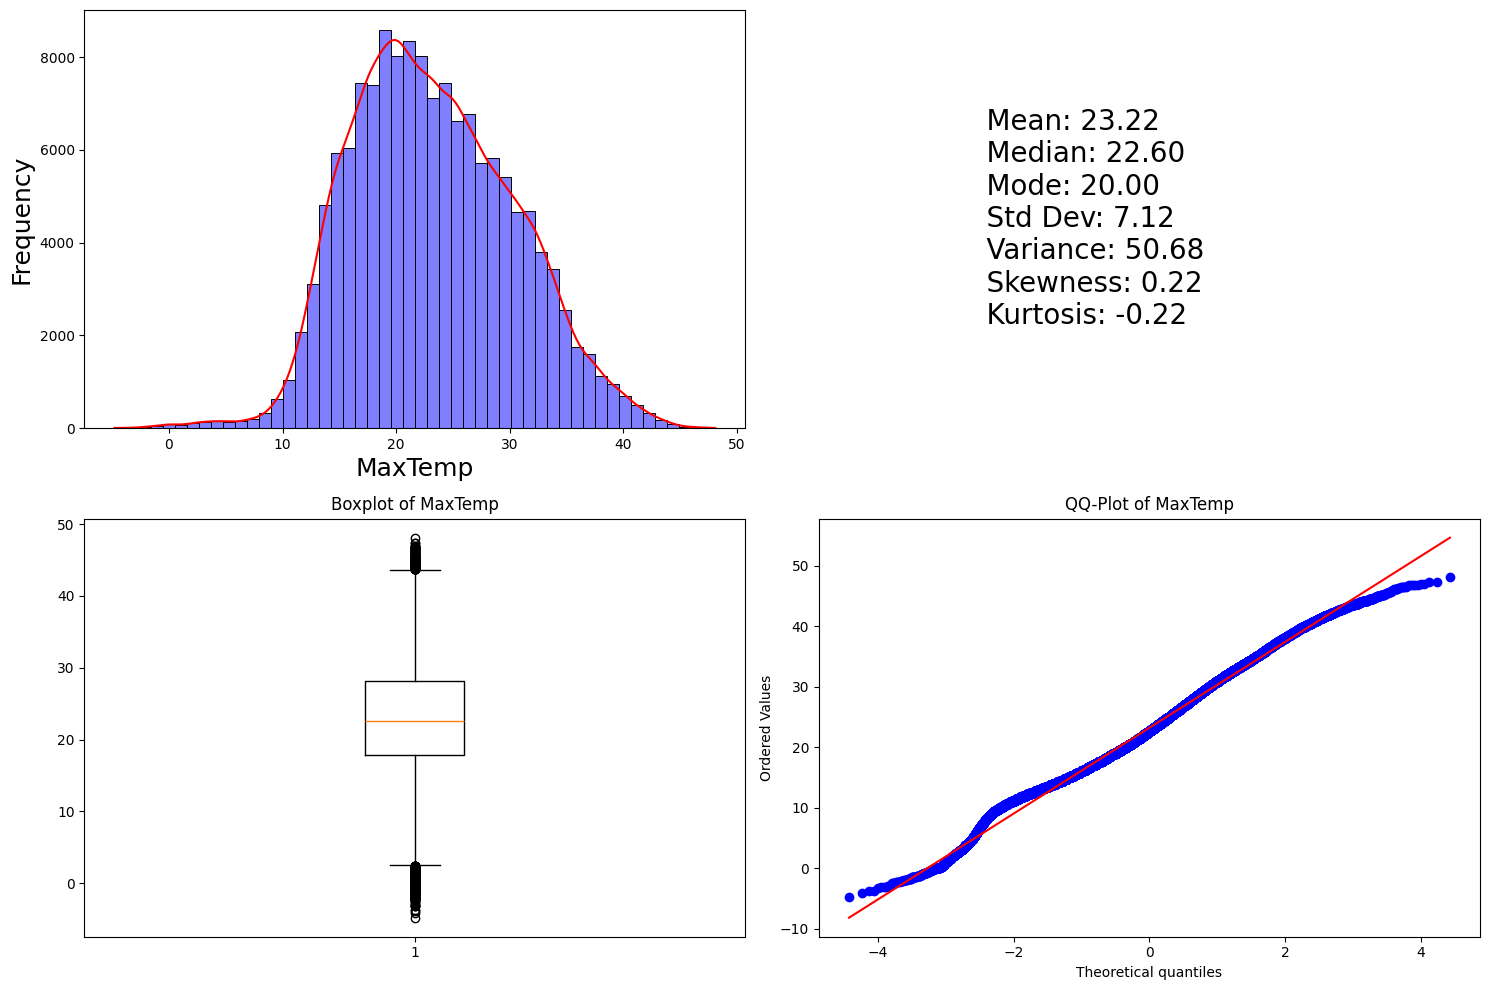

Column: Rainfall


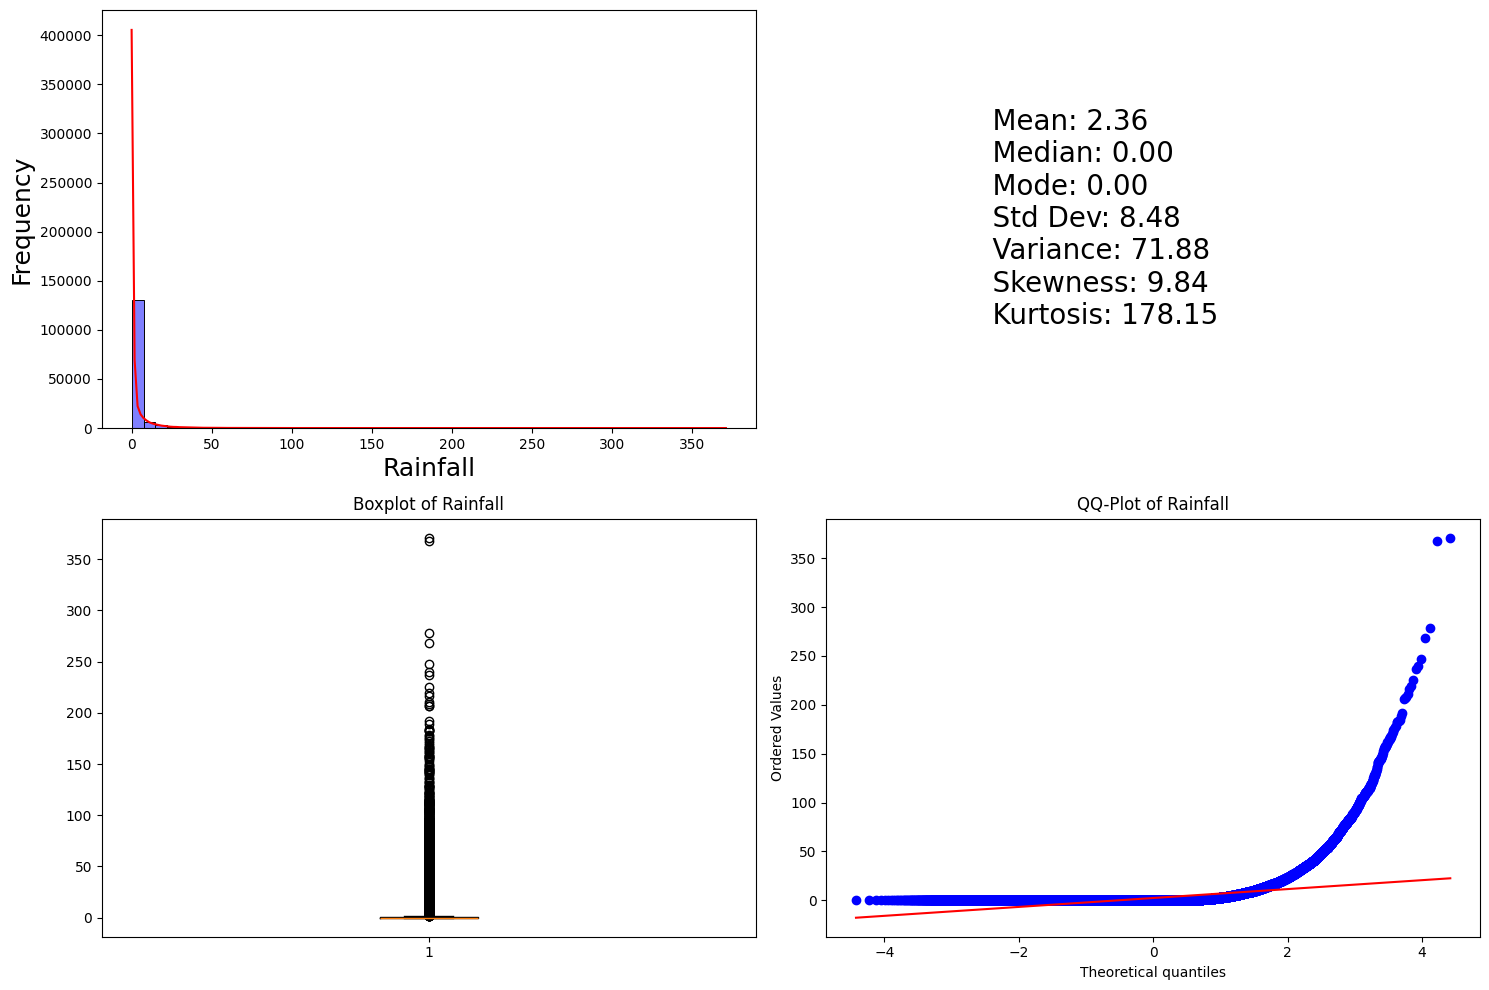

Column: Evaporation


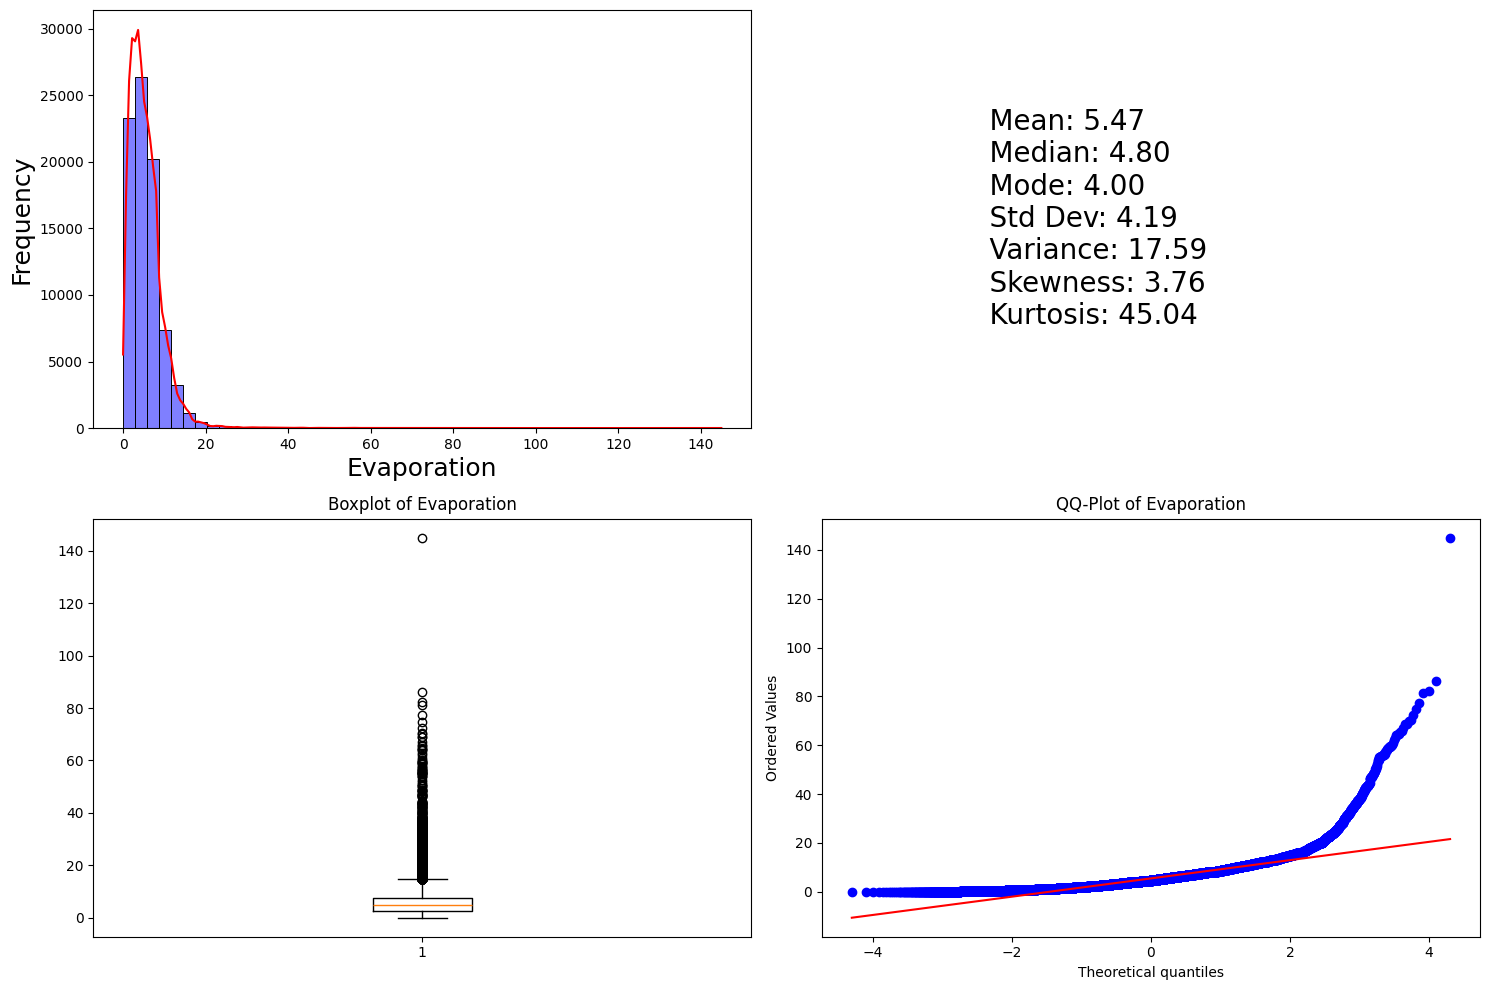

Column: Sunshine


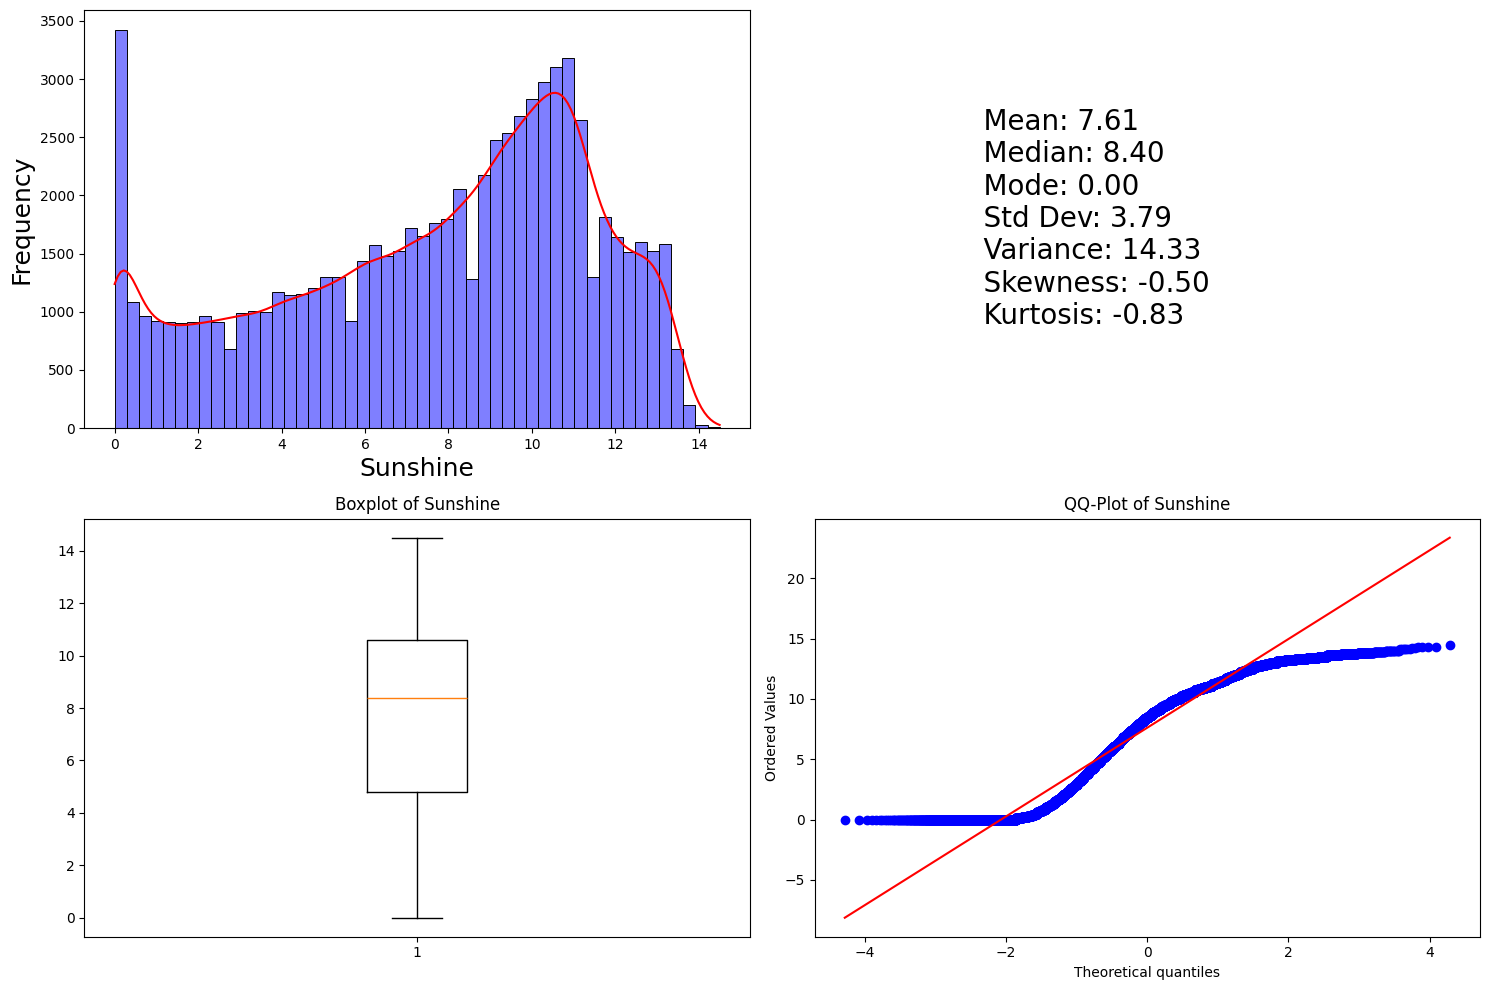

Column: WindGustSpeed


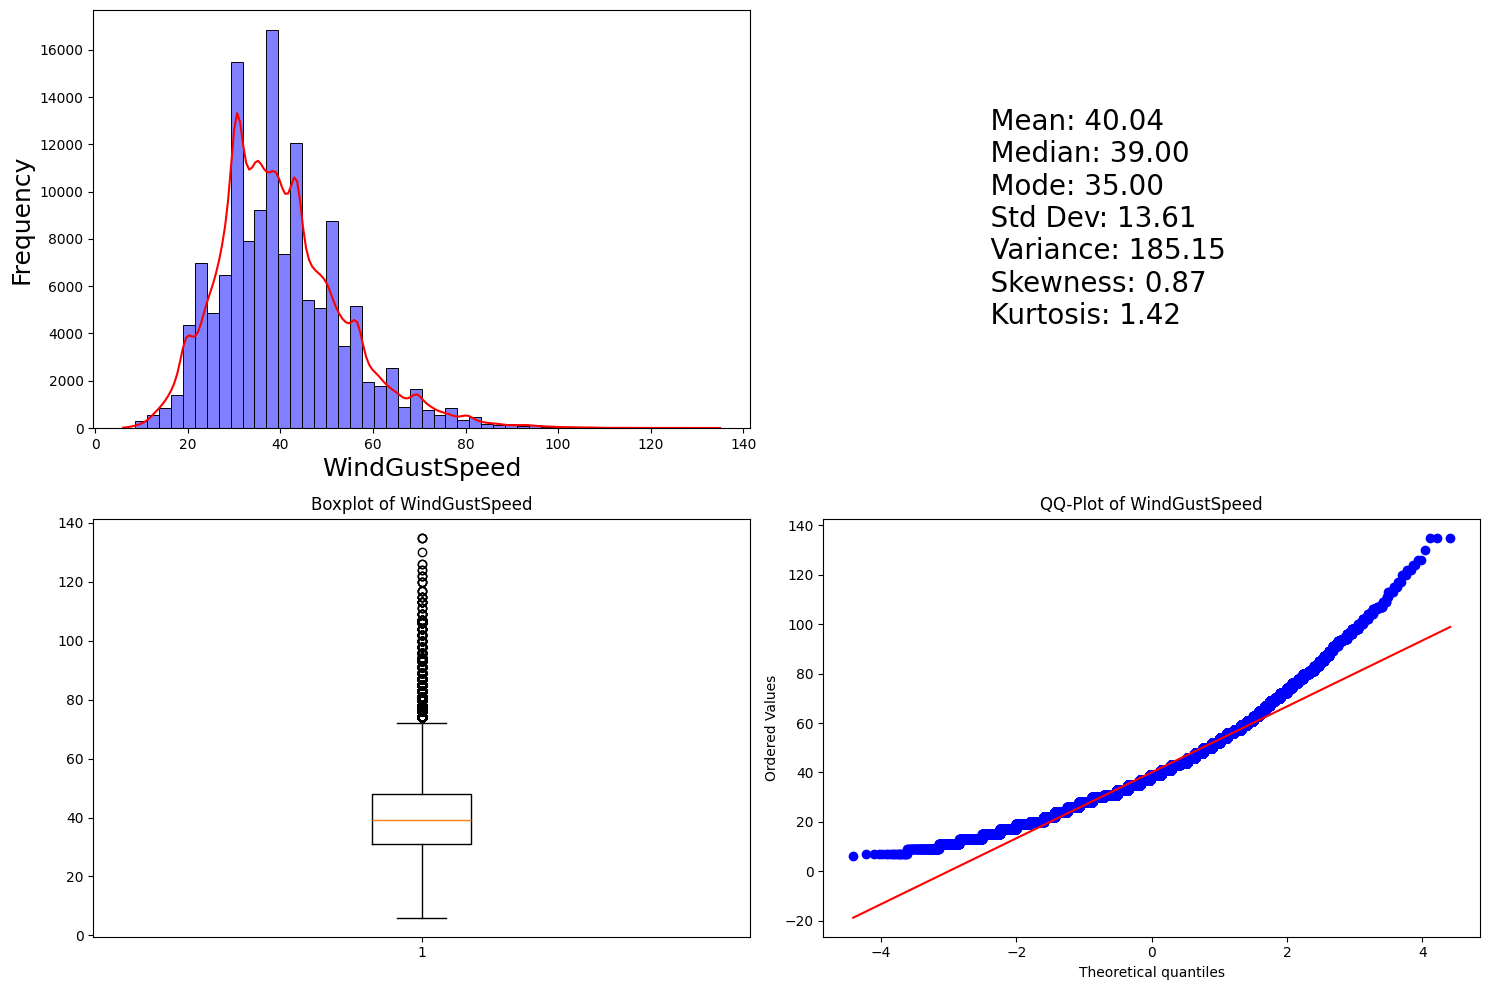

Column: WindSpeed9am


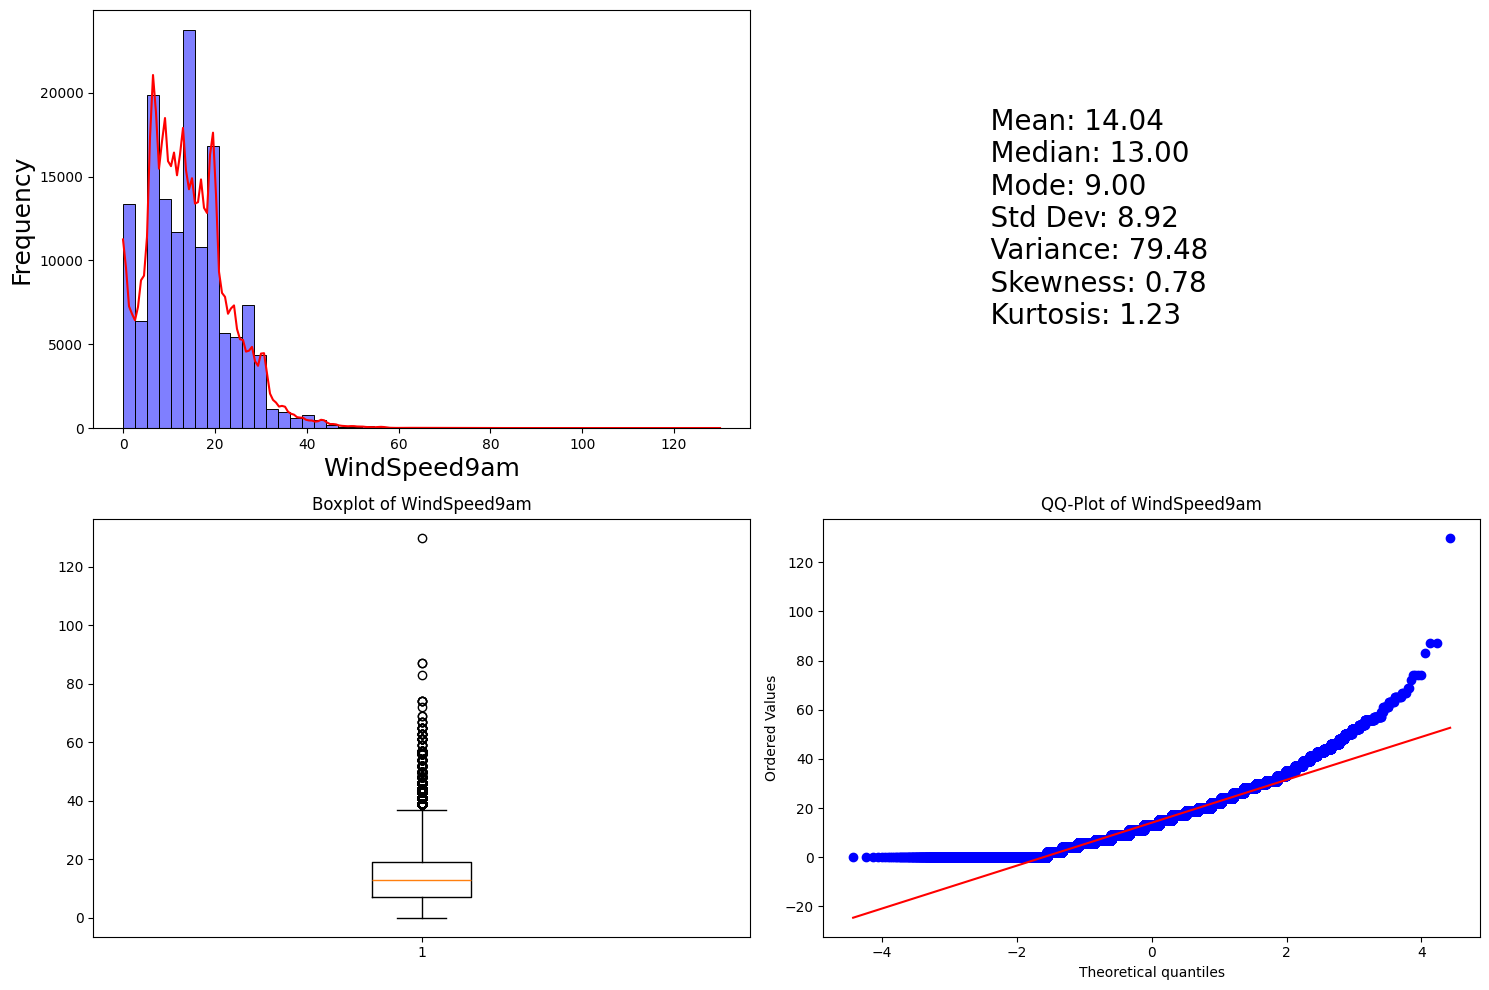

Column: WindSpeed3pm


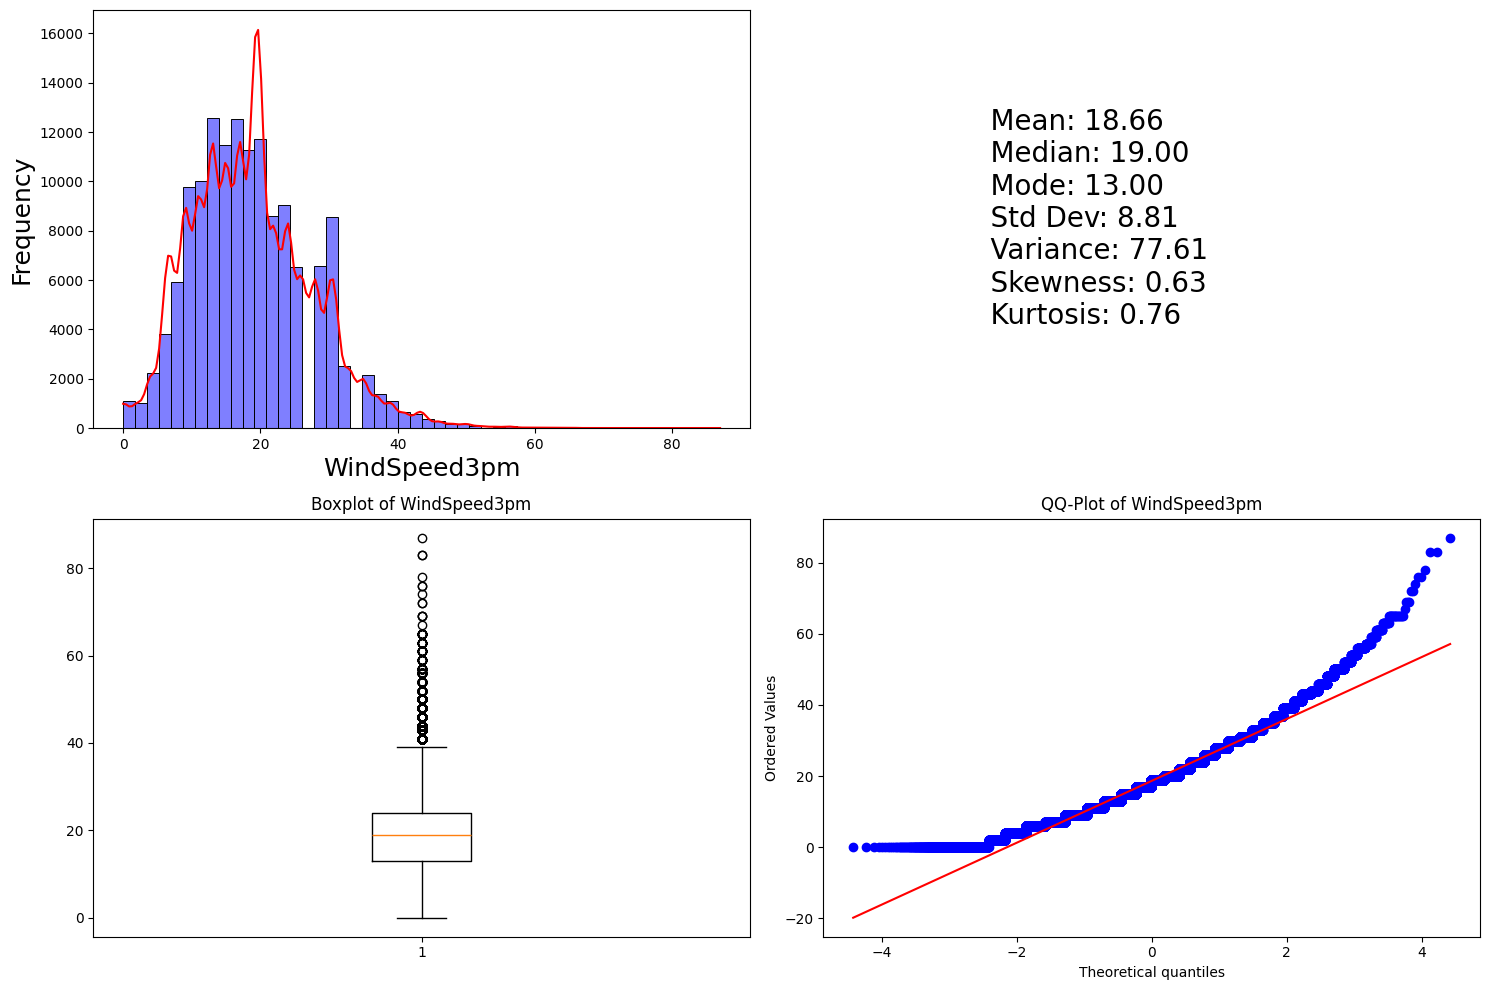

Column: Humidity9am


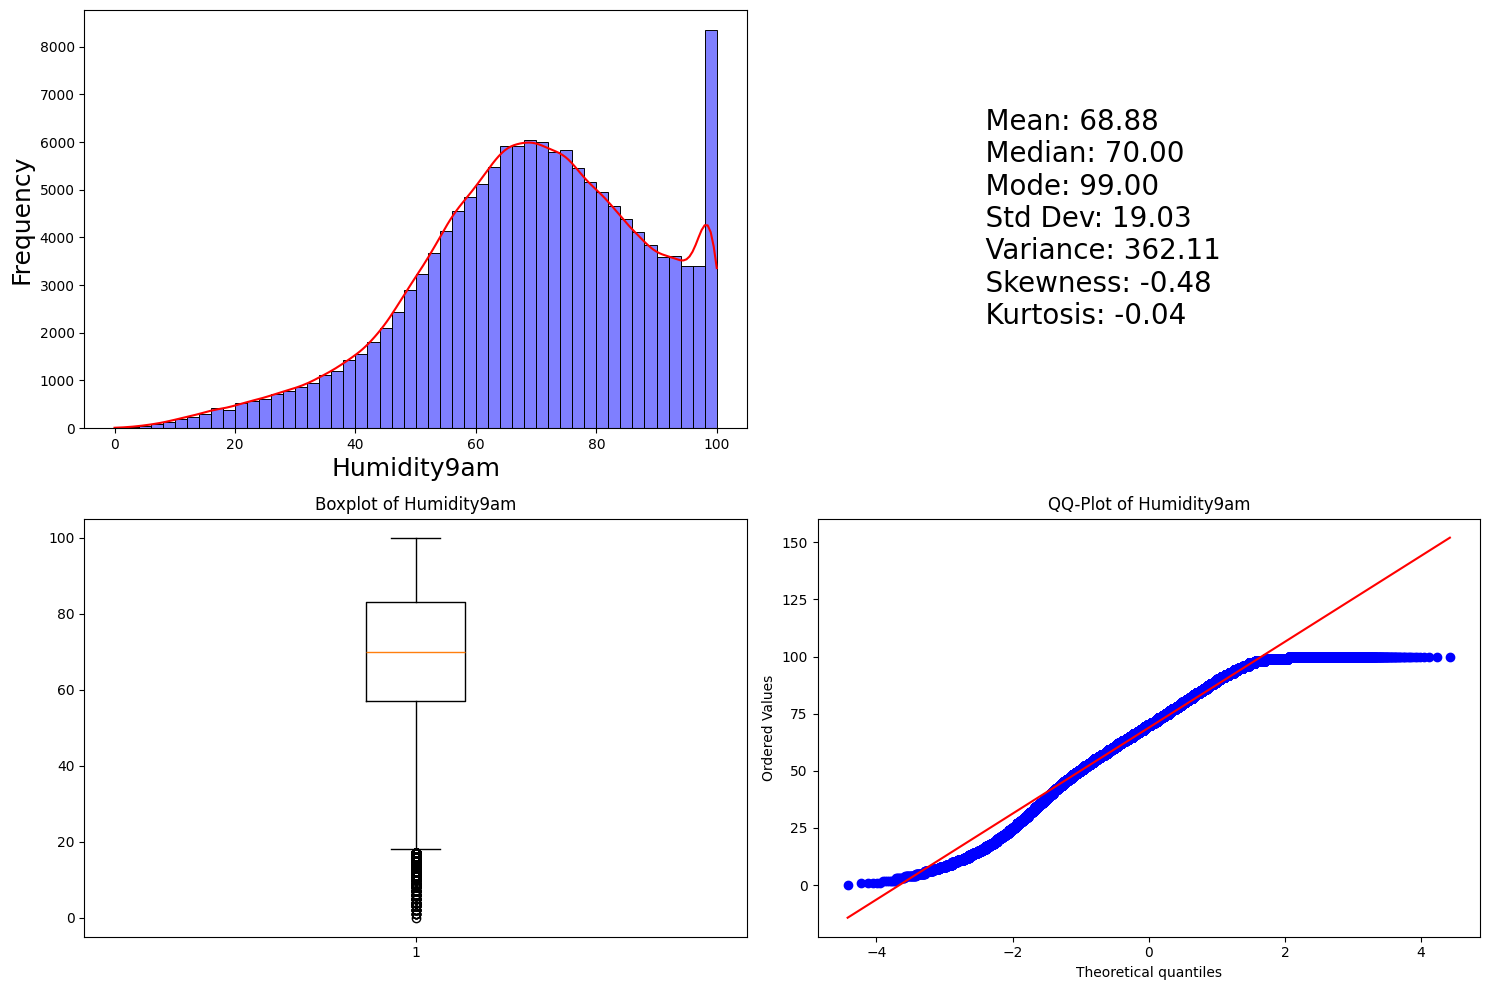

Column: Humidity3pm


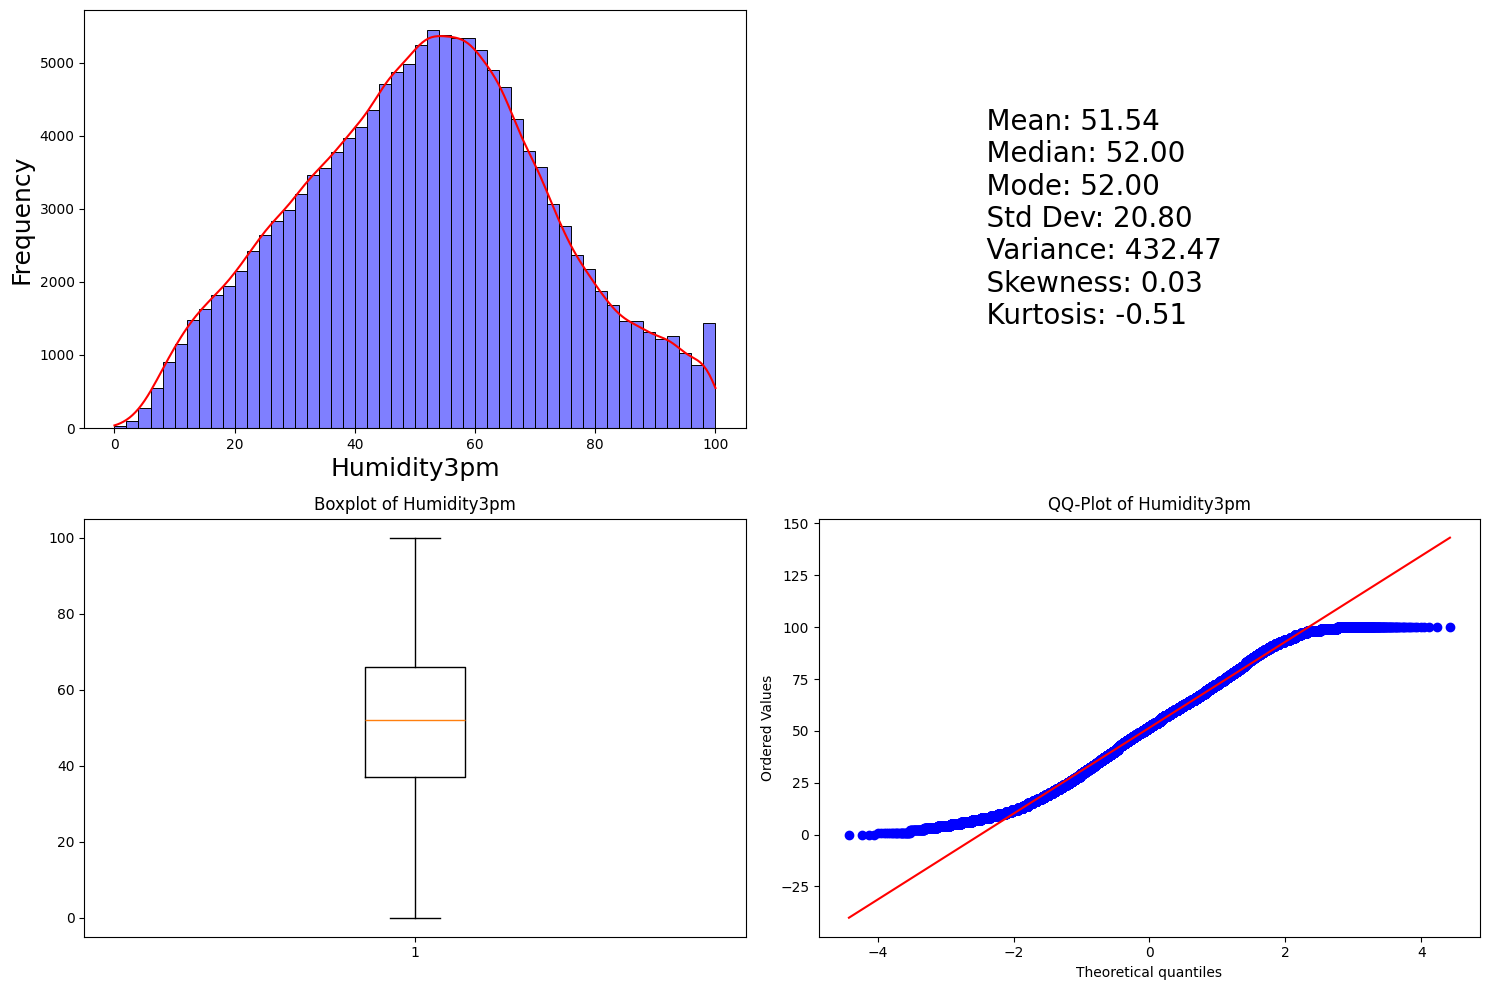

Column: Pressure9am


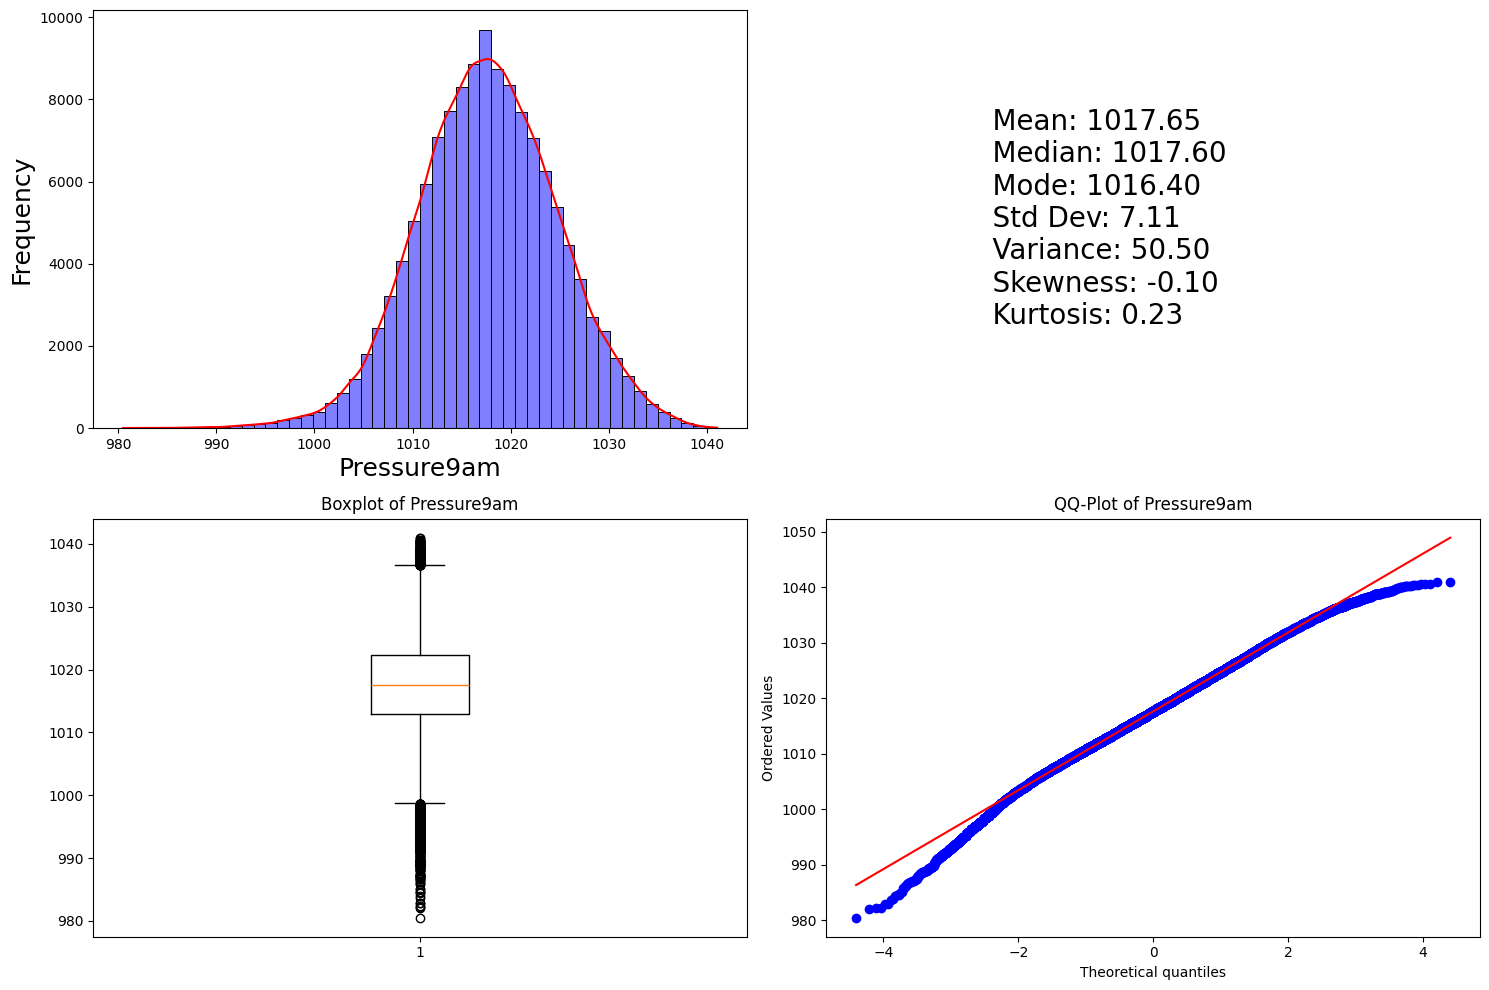

Column: Pressure3pm


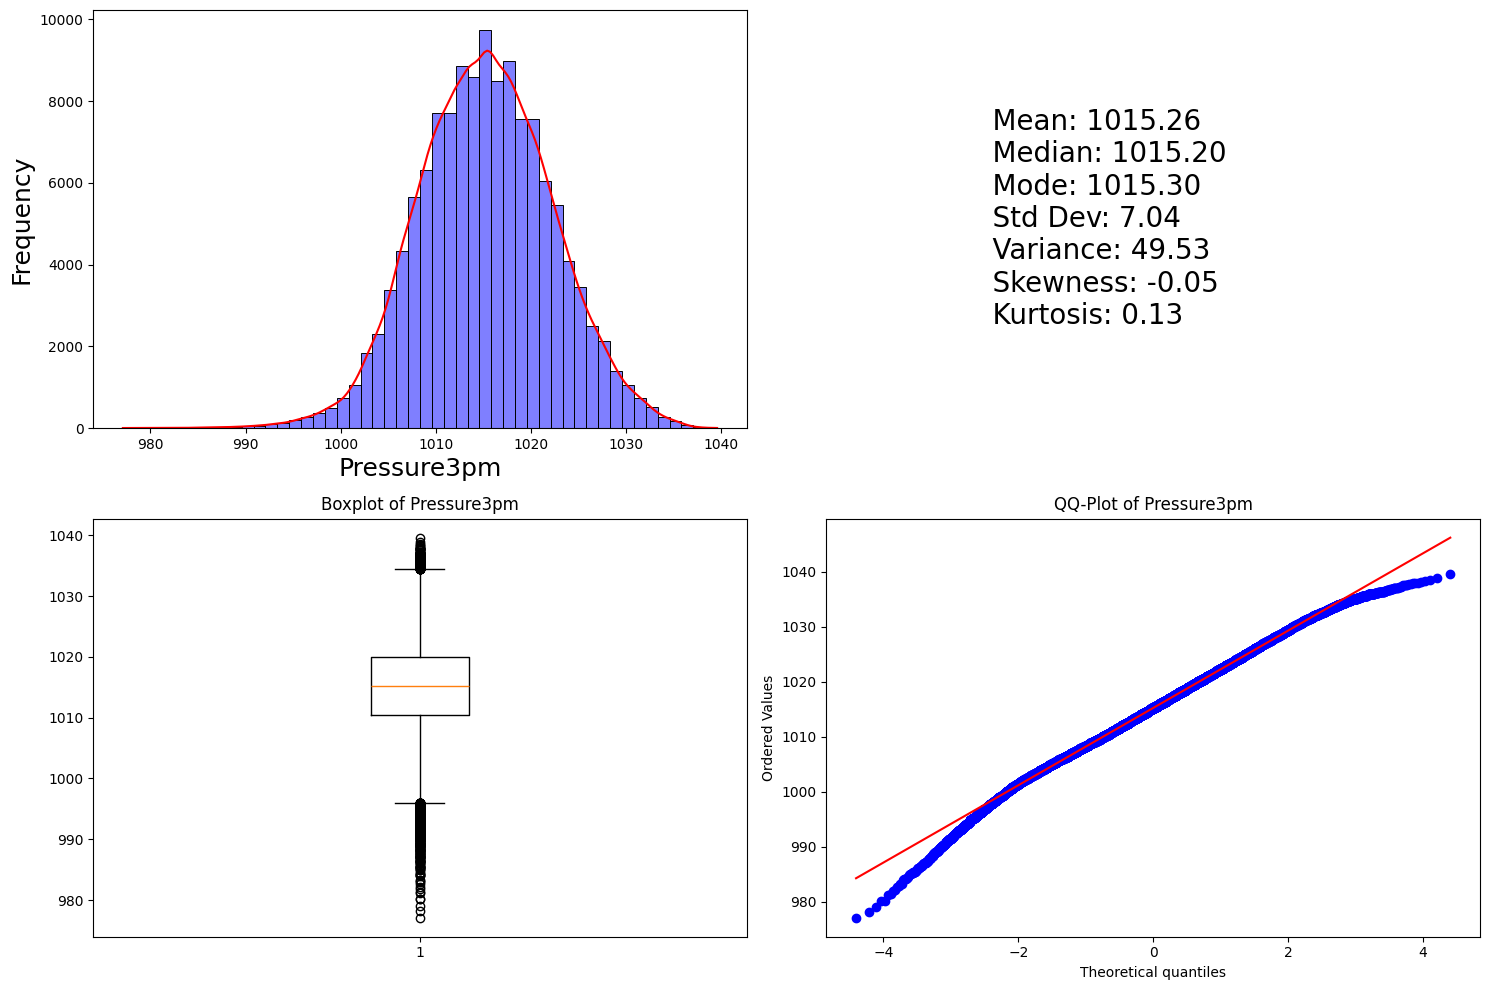

Column: Cloud9am


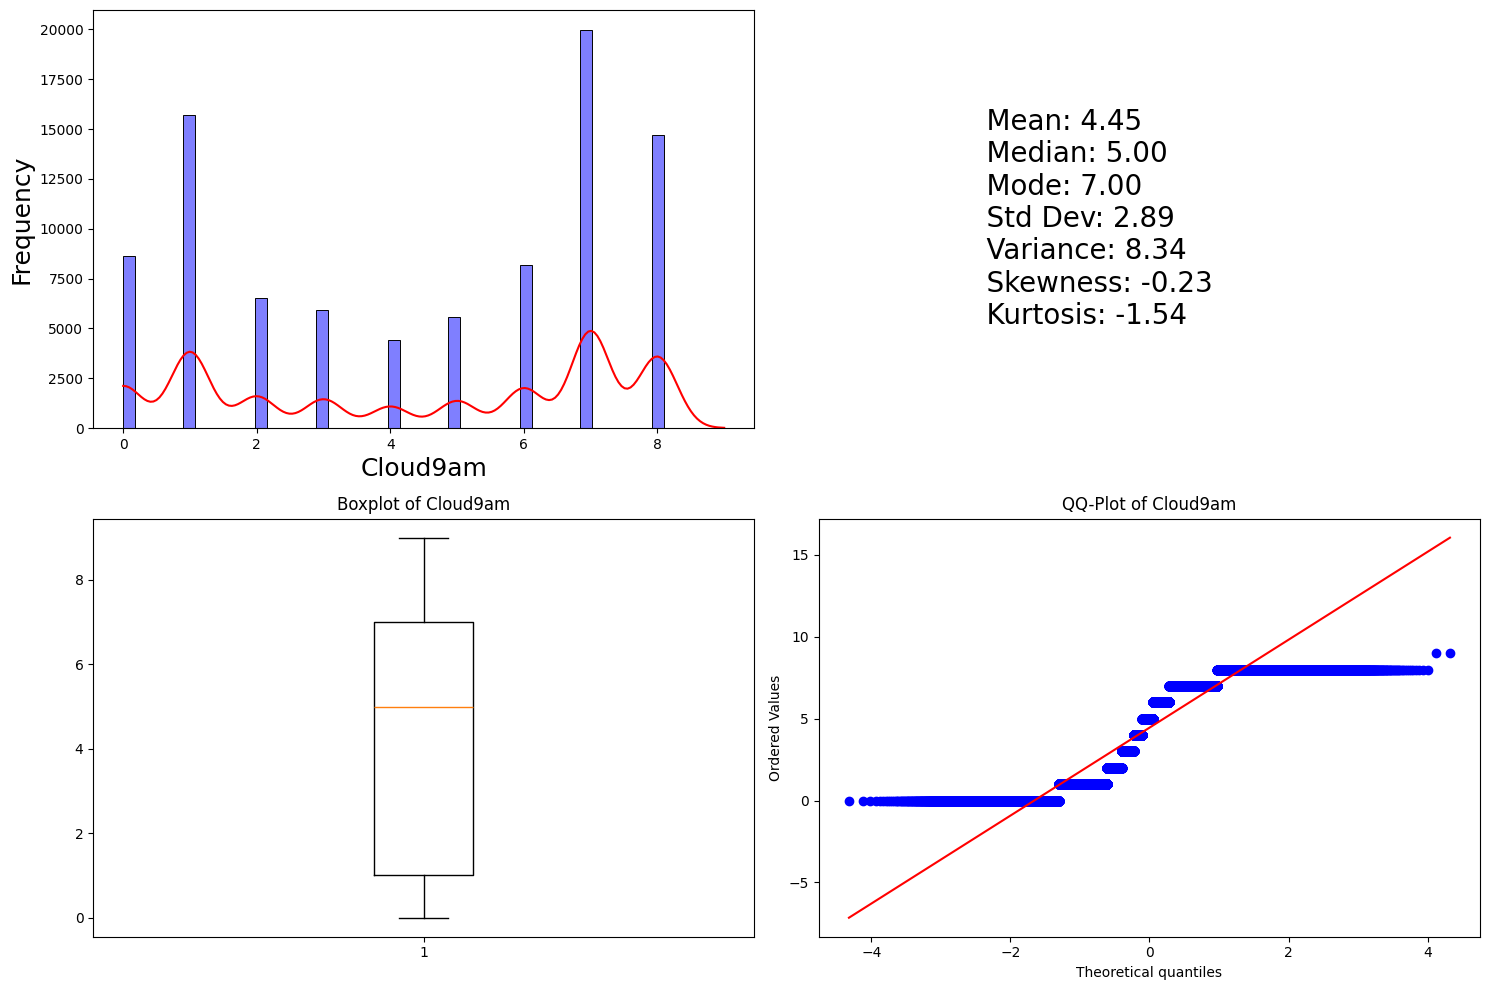

Column: Cloud3pm


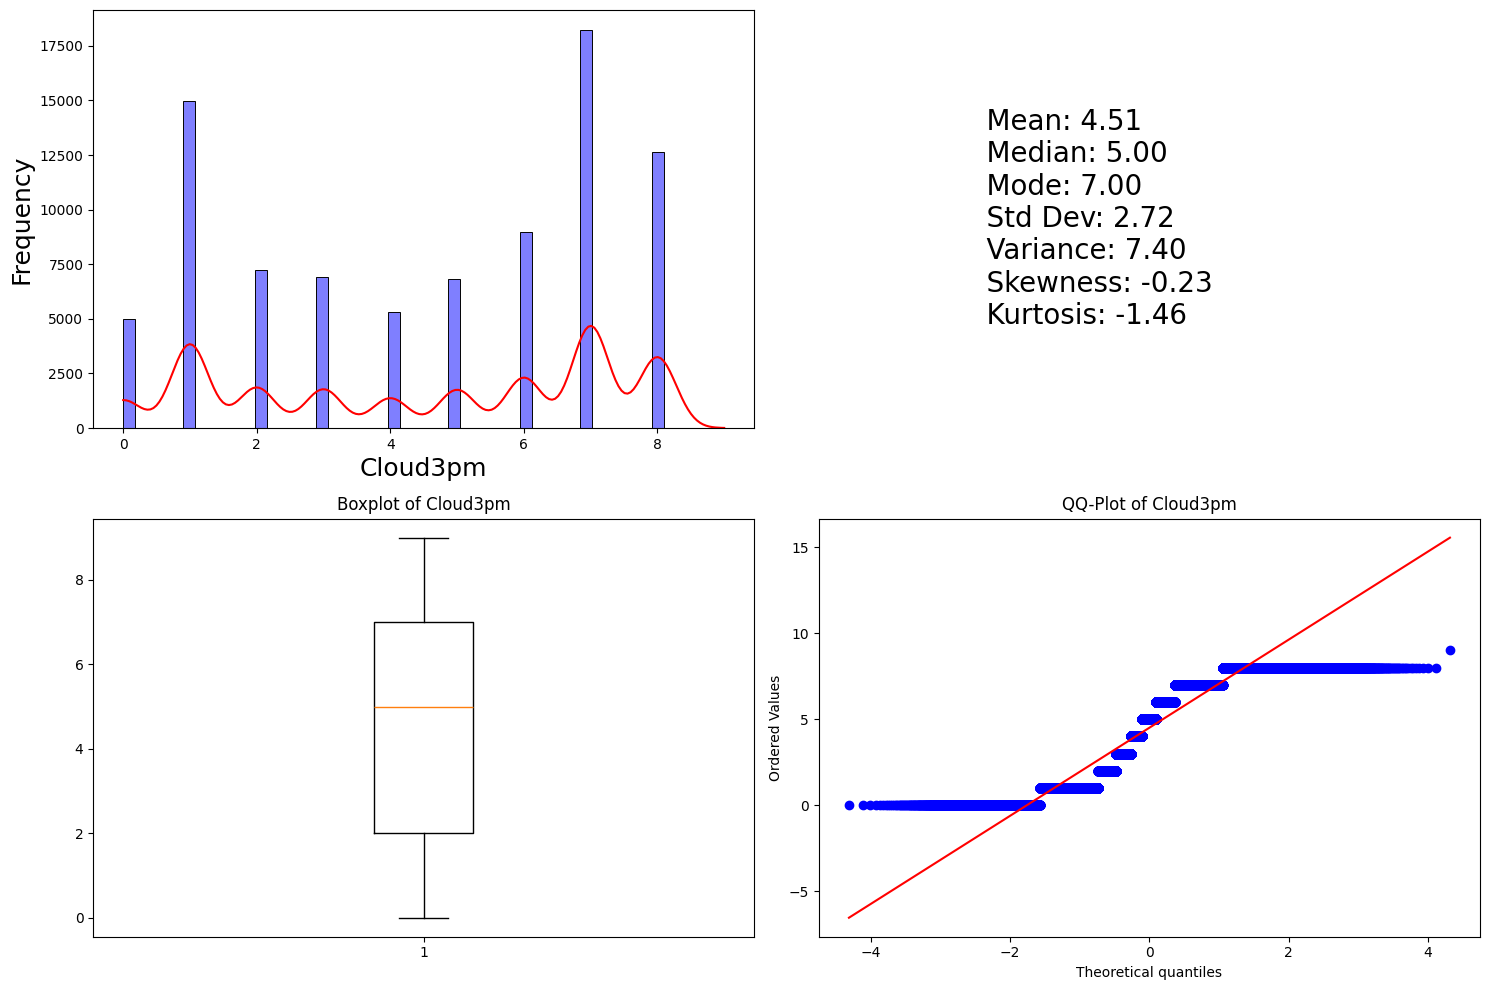

Column: Temp9am


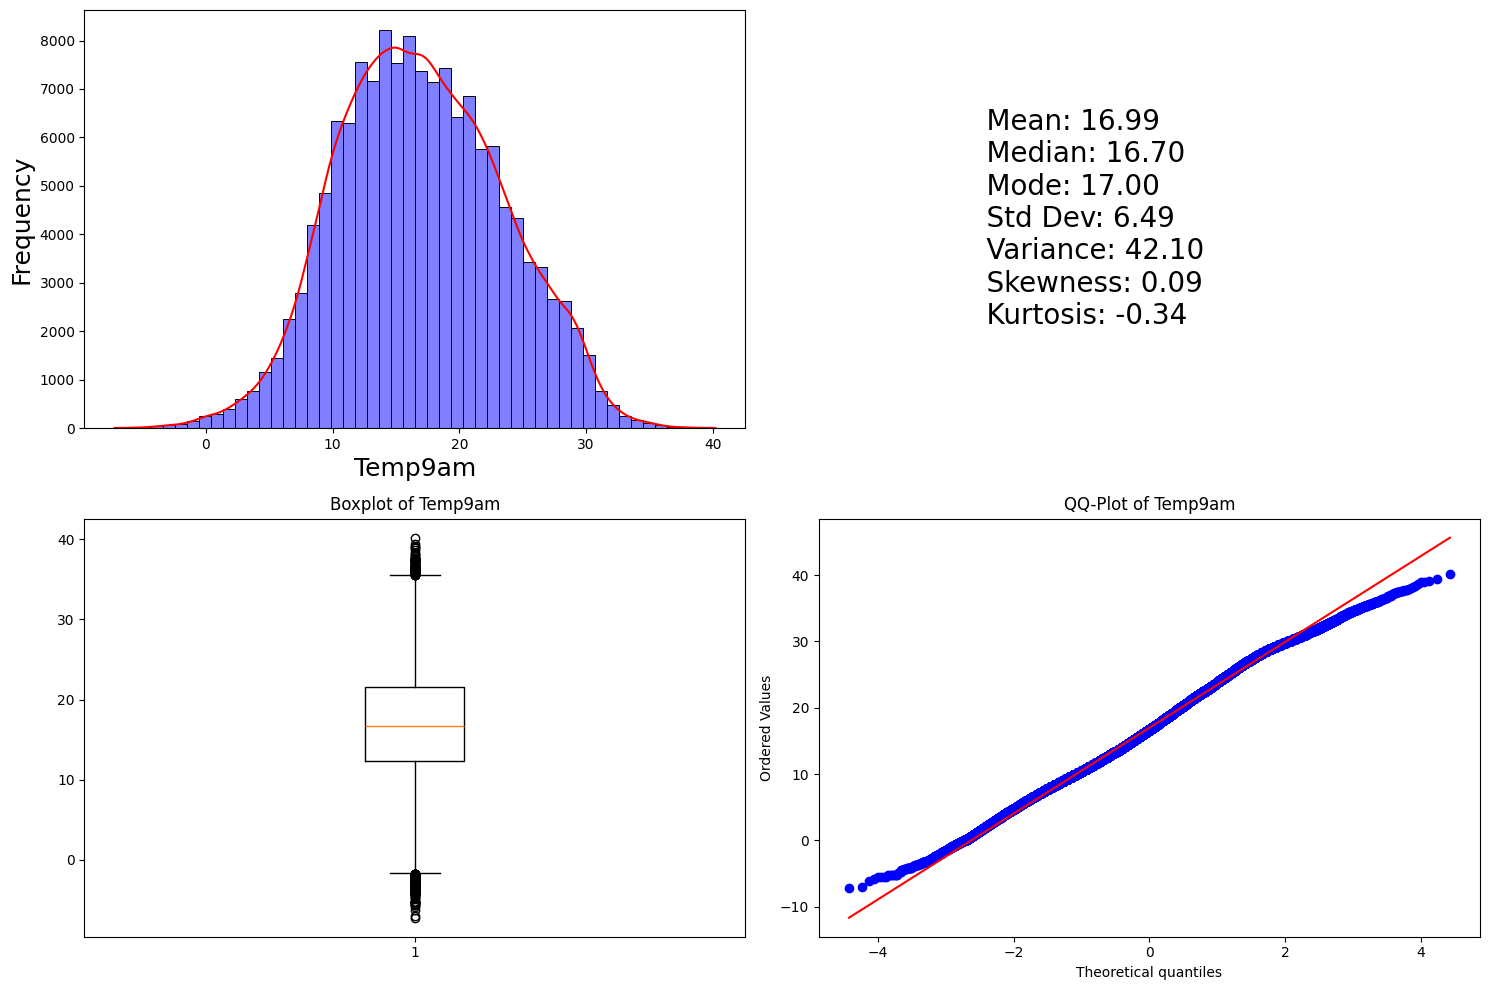

Column: Temp3pm


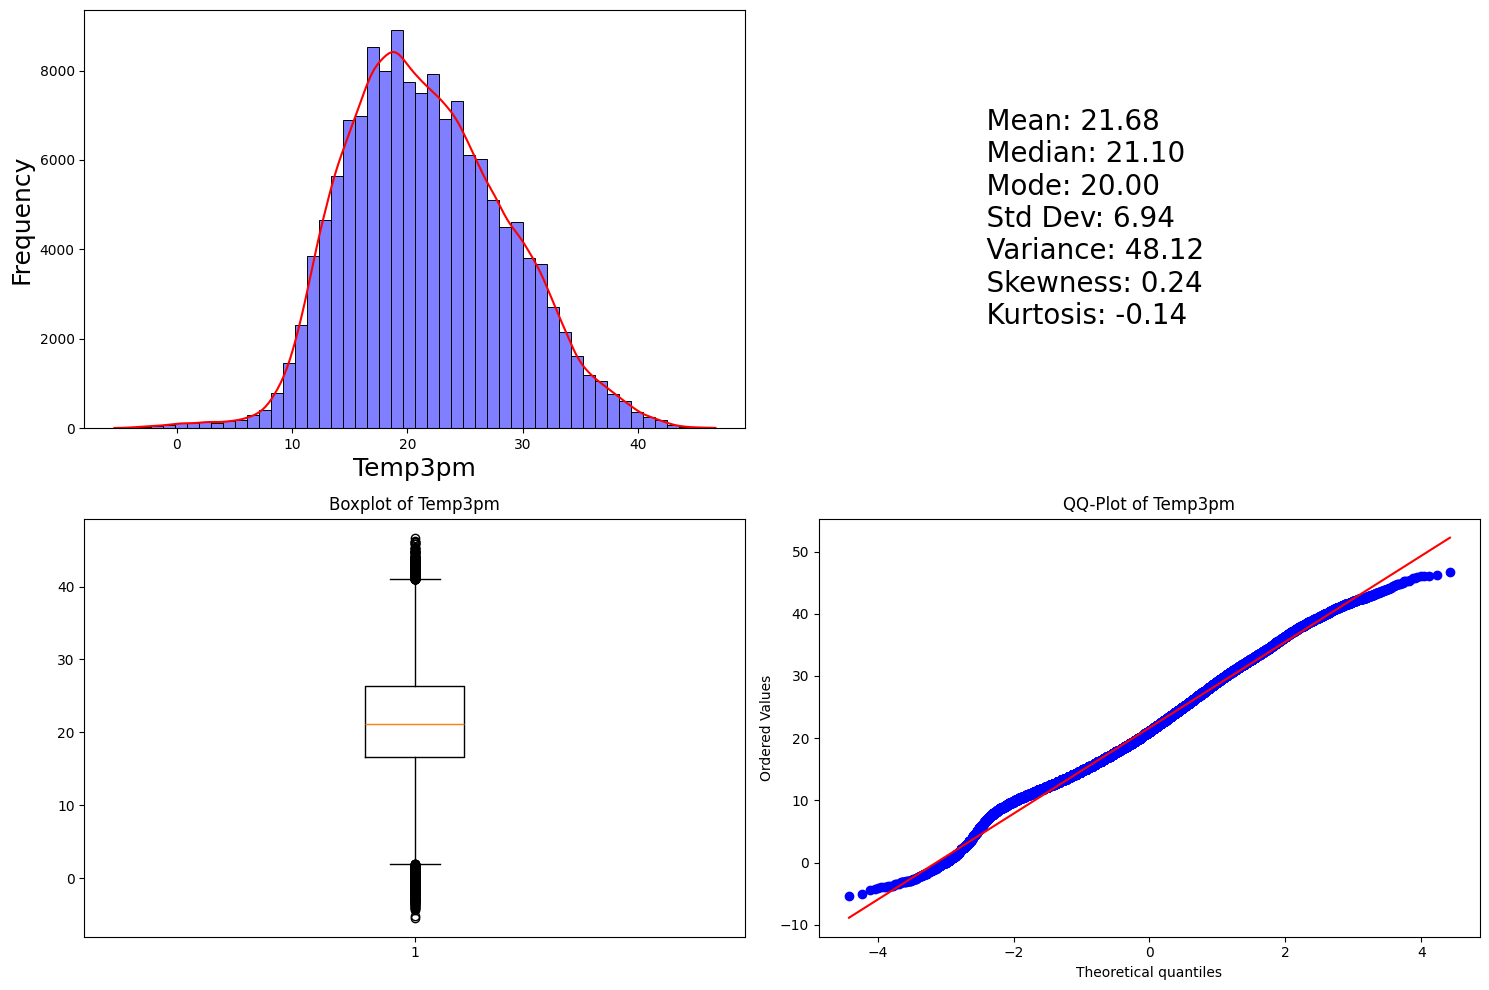

In [120]:
plot_histogram_and_statistics(data, data[numerical_columns(data)].columns, PLOT)

**Observaciones:**

**MinTemp y MaxTemp:** Ambas columnas tienen una media y mediana muy cercanas, lo que sugiere una distribución casi simétrica. La curtosis negativa indica que la distribución es platikúrtica.

**Rainfall:** La media es mucho mayor que la mediana, lo que indica una distribución sesgada a la derecha. La alta curtosis y oblicuidad sugieren la presencia de valores atípicos extremos. Su curtosis mayor que 3 indica que la distribución es leptokúrtica.

**Evaporation:** Similar a Rainfall, tiene una distribución sesgada a la derecha con valores atípicos extremos. Su curtosis mayor que 3 indica que la distribución es leptokúrtica.

**Sunshine:** La distribución muestra una ligera asimetría hacia la izquierda y exhibe características platikúrticas, indicando una menor frecuencia de valores extremos en comparación con una distribución normal. Un detalle notable en la gráfica es la abundancia de valores cero (0). Esta acumulación sugiere la posible presencia de errores o datos faltantes que han sido codificados como cero, lo cual requerirá una atención y tratamiento adecuados en etapas posteriores del análisis.

**WindGustSpeed, WindSpeed9am, WindSpeed3pm:** Estas columnas tienen una distribución ligeramente sesgada a la derecha, lo que indica que hay más días con velocidades de viento más bajas. Las tres distribuciones son mesokúrticas. 

**Humidity9am, Humidity3pm:** Ambas columnas tienen una distribución casi simétrica con una ligera oblicuidad negativa para Humidity9am y positiva para Humidity3pm. La distribuciones son platikúrticas.

**Pressure9am, Pressure3pm:** Ambas columnas tienen una distribución casi simétrica con una ligera oblicuidad negativa. Ambas distribuciones son mesokúrticas. 

**Cloud9am, Cloud3pm:** Ambas columnas tienen una distribución ligeramente sesgada a la izquierda y son platikúrticas.

**Temp9am, Temp3pm:** Ambas columnas tienen una distribución casi simétrica con una ligera oblicuidad positiva. Ambas distribuciones son platikúrticas.

En general, las columnas **Rainfall, Evaporation y Sunshine** parecen tener los valores más atípicos, lo que podría ser un área de interés para una investigación más profunda. Además, la mayoría de las columnas parecen tener una distribución aproximadamente simétrica, lo que es una buena señal para muchos modelos estadísticos.

#### **2.5.2. Categóricas:** Obtener conclusiones acerca de la cardinalidad, representación de cada categoría, etc. 

TypeError: Could not convert string '01/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/02/200802/02/200803/02/200804/02/200805/02/200806/02/200807/02/200808/02/200809/02/200810/02/200811/02/200812/02/200813/02/200814/02/200815/02/200816/02/200817/02/200818/02/200819/02/200820/02/200821/02/200822/02/200823/02/200824/02/200825/02/200826/02/200827/02/200828/02/200829/02/200801/03/200802/03/200803/03/200804/03/200805/03/200806/03/200807/03/200808/03/200809/03/200810/03/200811/03/200812/03/200813/03/200814/03/200815/03/200816/03/200817/03/200818/03/200819/03/200820/03/200821/03/200822/03/200823/03/200824/03/200825/03/200826/03/200827/03/200828/03/200829/03/200830/03/200831/03/200801/04/200802/04/200803/04/200804/04/200805/04/200806/04/200807/04/200808/04/200809/04/200810/04/200811/04/200812/04/200813/04/200814/04/200815/04/200816/04/200817/04/200818/04/200819/04/200820/04/200821/04/200822/04/200823/04/200824/04/200825/04/200826/04/200827/04/200828/04/200829/04/200830/04/200801/05/200802/05/200803/05/200804/05/200805/05/200806/05/200807/05/200808/05/200809/05/200810/05/200811/05/200812/05/200813/05/200814/05/200815/05/200816/05/200817/05/200818/05/200819/05/200820/05/200821/05/200822/05/200823/05/200824/05/200825/05/200826/05/200827/05/200828/05/200829/05/200830/05/200831/05/200801/06/200802/06/200803/06/200804/06/200805/06/200806/06/200807/06/200808/06/200809/06/200810/06/200811/06/200812/06/200813/06/200814/06/200815/06/200816/06/200817/06/200818/06/200819/06/200820/06/200821/06/200822/06/200823/06/200824/06/200825/06/200826/06/200827/06/200828/06/200829/06/200830/06/200801/07/200802/07/200803/07/200804/07/200805/07/200806/07/200807/07/200808/07/200809/07/200810/07/200811/07/200812/07/200813/07/200814/07/200815/07/200816/07/200817/07/200818/07/200819/07/200820/07/200821/07/200822/07/200823/07/200824/07/200825/07/200826/07/200827/07/200828/07/200829/07/200830/07/200831/07/200801/08/200802/08/200803/08/200804/08/200805/08/200806/08/200807/08/200808/08/200809/08/200810/08/200811/08/200812/08/200813/08/200814/08/200815/08/200816/08/200817/08/200818/08/200819/08/200820/08/200821/08/200822/08/200823/08/200824/08/200825/08/200826/08/200827/08/200828/08/200829/08/200830/08/200831/08/200801/09/200802/09/200803/09/200804/09/200805/09/200806/09/200807/09/200808/09/200809/09/200810/09/200811/09/200812/09/200813/09/200814/09/200815/09/200816/09/200817/09/200818/09/200819/09/200820/09/200821/09/200822/09/200823/09/200824/09/200825/09/200826/09/200827/09/200828/09/200829/09/200830/09/200801/10/200802/10/200803/10/200804/10/200805/10/200806/10/200807/10/200808/10/200809/10/200810/10/200811/10/200812/10/200813/10/200814/10/200815/10/200816/10/200817/10/200818/10/200819/10/200820/10/200821/10/200822/10/200823/10/200824/10/200825/10/200826/10/200827/10/200828/10/200829/10/200830/10/200831/10/200801/11/200802/11/200803/11/200804/11/200805/11/200806/11/200807/11/200808/11/200809/11/200810/11/200811/11/200812/11/200813/11/200814/11/200815/11/200816/11/200817/11/200818/11/200819/11/200820/11/200821/11/200822/11/200823/11/200824/11/200825/11/200826/11/200827/11/200828/11/200829/11/200830/11/200801/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/11/200702/11/200703/11/200704/11/200705/11/200706/11/200707/11/200708/11/200709/11/200710/11/200711/11/200712/11/200713/11/200714/11/200715/11/200716/11/200717/11/200718/11/200719/11/200720/11/200721/11/200722/11/200723/11/200724/11/200725/11/200726/11/200727/11/200728/11/200729/11/200730/11/200701/12/200702/12/200703/12/200704/12/200705/12/200706/12/200707/12/200708/12/200709/12/200710/12/200711/12/200712/12/200713/12/200714/12/200715/12/200716/12/200717/12/200718/12/200719/12/200720/12/200721/12/200722/12/200723/12/200724/12/200725/12/200726/12/200727/12/200728/12/200729/12/200730/12/200731/12/200701/01/200802/01/200803/01/200804/01/200805/01/200806/01/200807/01/200808/01/200809/01/200810/01/200811/01/200812/01/200813/01/200814/01/200815/01/200816/01/200817/01/200818/01/200819/01/200820/01/200821/01/200822/01/200823/01/200824/01/200825/01/200826/01/200827/01/200828/01/200829/01/200830/01/200831/01/200801/02/200802/02/200803/02/200804/02/200805/02/200806/02/200807/02/200808/02/200809/02/200810/02/200811/02/200812/02/200813/02/200814/02/200815/02/200816/02/200817/02/200818/02/200819/02/200820/02/200821/02/200822/02/200823/02/200824/02/200825/02/200826/02/200827/02/200828/02/200829/02/200801/03/200802/03/200803/03/200804/03/200805/03/200806/03/200807/03/200808/03/200809/03/200810/03/200811/03/200812/03/200813/03/200814/03/200815/03/200816/03/200817/03/200818/03/200819/03/200820/03/200821/03/200822/03/200823/03/200824/03/200825/03/200826/03/200827/03/200828/03/200829/03/200830/03/200831/03/200801/04/200802/04/200803/04/200804/04/200805/04/200806/04/200807/04/200808/04/200809/04/200810/04/200811/04/200812/04/200813/04/200814/04/200815/04/200816/04/200817/04/200818/04/200819/04/200820/04/200821/04/200822/04/200823/04/200824/04/200825/04/200826/04/200827/04/200828/04/200829/04/200830/04/200801/05/200802/05/200803/05/200804/05/200805/05/200806/05/200807/05/200808/05/200809/05/200810/05/200811/05/200812/05/200813/05/200814/05/200815/05/200816/05/200817/05/200818/05/200819/05/200820/05/200821/05/200822/05/200823/05/200824/05/200825/05/200826/05/200827/05/200828/05/200829/05/200830/05/200831/05/200801/06/200802/06/200803/06/200804/06/200805/06/200806/06/200807/06/200808/06/200809/06/200810/06/200811/06/200812/06/200813/06/200814/06/200815/06/200816/06/200817/06/200818/06/200819/06/200820/06/200821/06/200822/06/200823/06/200824/06/200825/06/200826/06/200827/06/200828/06/200829/06/200830/06/200801/07/200802/07/200803/07/200804/07/200805/07/200806/07/200807/07/200808/07/200809/07/200810/07/200811/07/200812/07/200813/07/200814/07/200815/07/200816/07/200817/07/200818/07/200819/07/200820/07/200821/07/200822/07/200823/07/200824/07/200825/07/200826/07/200827/07/200828/07/200829/07/200830/07/200831/07/200801/08/200802/08/200803/08/200804/08/200805/08/200806/08/200807/08/200808/08/200809/08/200810/08/200811/08/200812/08/200813/08/200814/08/200815/08/200816/08/200817/08/200818/08/200819/08/200820/08/200821/08/200822/08/200823/08/200824/08/200825/08/200826/08/200827/08/200828/08/200829/08/200830/08/200831/08/200801/09/200802/09/200803/09/200804/09/200805/09/200806/09/200807/09/200808/09/200809/09/200810/09/200811/09/200812/09/200813/09/200814/09/200815/09/200816/09/200817/09/200818/09/200819/09/200820/09/200821/09/200822/09/200823/09/200824/09/200825/09/200826/09/200827/09/200828/09/200829/09/200830/09/200801/10/200802/10/200803/10/200804/10/200805/10/200806/10/200807/10/200808/10/200809/10/200810/10/200811/10/200812/10/200813/10/200814/10/200815/10/200816/10/200817/10/200818/10/200819/10/200820/10/200821/10/200822/10/200823/10/200824/10/200825/10/200826/10/200827/10/200828/10/200829/10/200830/10/200831/10/200801/11/200802/11/200803/11/200804/11/200805/11/200806/11/200807/11/200808/11/200809/11/200810/11/200811/11/200812/11/200813/11/200814/11/200815/11/200816/11/200817/11/200818/11/200819/11/200820/11/200821/11/200822/11/200823/11/200824/11/200825/11/200826/11/200827/11/200828/11/200829/11/200830/11/200801/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/07/200802/07/200803/07/200804/07/200805/07/200806/07/200807/07/200808/07/200809/07/200810/07/200811/07/200812/07/200813/07/200814/07/200815/07/200816/07/200817/07/200818/07/200819/07/200820/07/200821/07/200822/07/200823/07/200824/07/200825/07/200826/07/200827/07/200828/07/200829/07/200830/07/200831/07/200801/08/200802/08/200803/08/200804/08/200805/08/200806/08/200807/08/200808/08/200809/08/200810/08/200811/08/200812/08/200813/08/200814/08/200815/08/200816/08/200817/08/200818/08/200819/08/200820/08/200821/08/200822/08/200823/08/200824/08/200825/08/200826/08/200827/08/200828/08/200829/08/200830/08/200831/08/200801/09/200802/09/200803/09/200804/09/200805/09/200806/09/200807/09/200808/09/200809/09/200810/09/200811/09/200812/09/200813/09/200814/09/200815/09/200816/09/200817/09/200818/09/200819/09/200820/09/200821/09/200822/09/200823/09/200824/09/200825/09/200826/09/200827/09/200828/09/200829/09/200830/09/200801/10/200802/10/200803/10/200804/10/200805/10/200806/10/200807/10/200808/10/200809/10/200810/10/200811/10/200812/10/200813/10/200814/10/200815/10/200816/10/200817/10/200818/10/200819/10/200820/10/200821/10/200822/10/200823/10/200824/10/200825/10/200826/10/200827/10/200828/10/200829/10/200830/10/200831/10/200801/11/200802/11/200803/11/200804/11/200805/11/200806/11/200807/11/200808/11/200809/11/200810/11/200811/11/200812/11/200813/11/200814/11/200815/11/200816/11/200817/11/200818/11/200819/11/200820/11/200821/11/200822/11/200823/11/200824/11/200825/11/200826/11/200827/11/200828/11/200829/11/200830/11/200801/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/07/200802/07/200803/07/200804/07/200805/07/200806/07/200807/07/200808/07/200809/07/200810/07/200811/07/200812/07/200813/07/200814/07/200815/07/200816/07/200817/07/200818/07/200819/07/200820/07/200821/07/200822/07/200823/07/200824/07/200825/07/200826/07/200827/07/200828/07/200829/07/200830/07/200831/07/200801/08/200802/08/200803/08/200804/08/200805/08/200806/08/200807/08/200808/08/200809/08/200810/08/200811/08/200812/08/200813/08/200814/08/200815/08/200816/08/200817/08/200818/08/200819/08/200820/08/200821/08/200822/08/200823/08/200824/08/200825/08/200826/08/200827/08/200828/08/200829/08/200830/08/200831/08/200801/09/200802/09/200803/09/200804/09/200805/09/200806/09/200807/09/200808/09/200809/09/200810/09/200811/09/200812/09/200813/09/200814/09/200815/09/200816/09/200817/09/200818/09/200819/09/200820/09/200821/09/200822/09/200823/09/200824/09/200825/09/200826/09/200827/09/200828/09/200829/09/200830/09/200801/10/200802/10/200803/10/200804/10/200805/10/200806/10/200807/10/200808/10/200809/10/200810/10/200811/10/200812/10/200813/10/200814/10/200815/10/200816/10/200817/10/200818/10/200819/10/200820/10/200821/10/200822/10/200823/10/200824/10/200825/10/200826/10/200827/10/200828/10/200829/10/200830/10/200831/10/200801/11/200802/11/200803/11/200804/11/200805/11/200806/11/200807/11/200808/11/200809/11/200810/11/200811/11/200812/11/200813/11/200814/11/200815/11/200816/11/200817/11/200818/11/200819/11/200820/11/200821/11/200822/11/200823/11/200824/11/200825/11/200826/11/200827/11/200828/11/200829/11/200830/11/200801/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/07/200802/07/200803/07/200804/07/200805/07/200806/07/200807/07/200808/07/200809/07/200810/07/200811/07/200812/07/200813/07/200814/07/200815/07/200816/07/200817/07/200818/07/200819/07/200820/07/200821/07/200822/07/200823/07/200824/07/200825/07/200826/07/200827/07/200828/07/200829/07/200830/07/200831/07/200801/08/200802/08/200803/08/200804/08/200805/08/200806/08/200807/08/200808/08/200809/08/200810/08/200811/08/200812/08/200813/08/200814/08/200815/08/200816/08/200817/08/200818/08/200819/08/200820/08/200821/08/200822/08/200823/08/200824/08/200825/08/200826/08/200827/08/200828/08/200829/08/200830/08/200831/08/200801/09/200802/09/200803/09/200804/09/200805/09/200806/09/200807/09/200808/09/200809/09/200810/09/200811/09/200812/09/200813/09/200814/09/200815/09/200816/09/200817/09/200818/09/200819/09/200820/09/200821/09/200822/09/200823/09/200824/09/200825/09/200826/09/200827/09/200828/09/200829/09/200830/09/200801/10/200802/10/200803/10/200804/10/200805/10/200806/10/200807/10/200808/10/200809/10/200810/10/200811/10/200812/10/200813/10/200814/10/200815/10/200816/10/200817/10/200818/10/200819/10/200820/10/200821/10/200822/10/200823/10/200824/10/200825/10/200826/10/200827/10/200828/10/200829/10/200830/10/200831/10/200801/11/200802/11/200803/11/200804/11/200805/11/200806/11/200807/11/200808/11/200809/11/200810/11/200811/11/200812/11/200813/11/200814/11/200815/11/200816/11/200817/11/200818/11/200819/11/200820/11/200821/11/200822/11/200823/11/200824/11/200825/11/200826/11/200827/11/200828/11/200829/11/200830/11/200801/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/07/200802/07/200803/07/200804/07/200805/07/200806/07/200807/07/200808/07/200809/07/200810/07/200811/07/200812/07/200813/07/200814/07/200815/07/200816/07/200817/07/200818/07/200819/07/200820/07/200821/07/200822/07/200823/07/200824/07/200825/07/200826/07/200827/07/200828/07/200829/07/200830/07/200831/07/200801/08/200802/08/200803/08/200804/08/200805/08/200806/08/200807/08/200808/08/200809/08/200810/08/200811/08/200812/08/200813/08/200814/08/200815/08/200816/08/200817/08/200818/08/200819/08/200820/08/200821/08/200822/08/200823/08/200824/08/200825/08/200826/08/200827/08/200828/08/200829/08/200830/08/200831/08/200801/09/200802/09/200803/09/200804/09/200805/09/200806/09/200807/09/200808/09/200809/09/200810/09/200811/09/200812/09/200813/09/200814/09/200815/09/200816/09/200817/09/200818/09/200819/09/200820/09/200821/09/200822/09/200823/09/200824/09/200825/09/200826/09/200827/09/200828/09/200829/09/200830/09/200801/10/200802/10/200803/10/200804/10/200805/10/200806/10/200807/10/200808/10/200809/10/200810/10/200811/10/200812/10/200813/10/200814/10/200815/10/200816/10/200817/10/200818/10/200819/10/200820/10/200821/10/200822/10/200823/10/200824/10/200825/10/200826/10/200827/10/200828/10/200829/10/200830/10/200831/10/200801/11/200802/11/200803/11/200804/11/200805/11/200806/11/200807/11/200808/11/200809/11/200810/11/200811/11/200812/11/200813/11/200814/11/200815/11/200816/11/200817/11/200818/11/200819/11/200820/11/200821/11/200822/11/200823/11/200824/11/200825/11/200826/11/200827/11/200828/11/200829/11/200830/11/200801/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/07/200802/07/200803/07/200804/07/200805/07/200806/07/200807/07/200808/07/200809/07/200810/07/200811/07/200812/07/200813/07/200814/07/200815/07/200816/07/200817/07/200818/07/200819/07/200820/07/200821/07/200822/07/200823/07/200824/07/200825/07/200826/07/200827/07/200828/07/200829/07/200830/07/200831/07/200801/08/200802/08/200803/08/200804/08/200805/08/200806/08/200807/08/200808/08/200809/08/200810/08/200811/08/200812/08/200813/08/200814/08/200815/08/200816/08/200817/08/200818/08/200819/08/200820/08/200821/08/200822/08/200823/08/200824/08/200825/08/200826/08/200827/08/200828/08/200829/08/200830/08/200831/08/200801/09/200802/09/200803/09/200804/09/200805/09/200806/09/200807/09/200808/09/200809/09/200810/09/200811/09/200812/09/200813/09/200814/09/200815/09/200816/09/200817/09/200818/09/200819/09/200820/09/200821/09/200822/09/200823/09/200824/09/200825/09/200826/09/200827/09/200828/09/200829/09/200830/09/200801/10/200802/10/200803/10/200804/10/200805/10/200806/10/200807/10/200808/10/200809/10/200810/10/200811/10/200812/10/200813/10/200814/10/200815/10/200816/10/200817/10/200818/10/200819/10/200820/10/200821/10/200822/10/200823/10/200824/10/200825/10/200826/10/200827/10/200828/10/200829/10/200830/10/200831/10/200801/11/200802/11/200803/11/200804/11/200805/11/200806/11/200807/11/200808/11/200809/11/200810/11/200811/11/200812/11/200813/11/200814/11/200815/11/200816/11/200817/11/200818/11/200819/11/200820/11/200821/11/200822/11/200823/11/200824/11/200825/11/200826/11/200827/11/200828/11/200829/11/200830/11/200801/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/07/200802/07/200803/07/200804/07/200805/07/200806/07/200807/07/200808/07/200809/07/200810/07/200811/07/200812/07/200813/07/200814/07/200815/07/200816/07/200817/07/200818/07/200819/07/200820/07/200821/07/200822/07/200823/07/200824/07/200825/07/200826/07/200827/07/200828/07/200829/07/200830/07/200831/07/200801/08/200802/08/200803/08/200804/08/200805/08/200806/08/200807/08/200808/08/200809/08/200810/08/200811/08/200812/08/200813/08/200814/08/200815/08/200816/08/200817/08/200818/08/200819/08/200820/08/200821/08/200822/08/200823/08/200824/08/200825/08/200826/08/200827/08/200828/08/200829/08/200830/08/200831/08/200801/09/200802/09/200803/09/200804/09/200805/09/200806/09/200807/09/200808/09/200809/09/200810/09/200811/09/200812/09/200813/09/200814/09/200815/09/200816/09/200817/09/200818/09/200819/09/200820/09/200821/09/200822/09/200823/09/200824/09/200825/09/200826/09/200827/09/200828/09/200829/09/200830/09/200801/10/200802/10/200803/10/200804/10/200805/10/200806/10/200807/10/200808/10/200809/10/200810/10/200811/10/200812/10/200813/10/200814/10/200815/10/200816/10/200817/10/200818/10/200819/10/200820/10/200821/10/200822/10/200823/10/200824/10/200825/10/200826/10/200827/10/200828/10/200829/10/200830/10/200831/10/200801/11/200802/11/200803/11/200804/11/200805/11/200806/11/200807/11/200808/11/200809/11/200810/11/200811/11/200812/11/200813/11/200814/11/200815/11/200816/11/200817/11/200818/11/200819/11/200820/11/200821/11/200822/11/200823/11/200824/11/200825/11/200826/11/200827/11/200828/11/200829/11/200830/11/200801/12/200802/12/200803/12/200804/12/200805/12/200806/12/200807/12/200808/12/200809/12/200810/12/200811/12/200812/12/200813/12/200814/12/200815/12/200816/12/200817/12/200818/12/200819/12/200820/12/200821/12/200822/12/200823/12/200824/12/200825/12/200826/12/200827/12/200828/12/200829/12/200830/12/200831/12/200801/01/200902/01/200903/01/200904/01/200905/01/200906/01/200907/01/200908/01/200909/01/200910/01/200911/01/200912/01/200913/01/200914/01/200915/01/200916/01/200917/01/200918/01/200919/01/200920/01/200921/01/200922/01/200923/01/200924/01/200925/01/200926/01/200927/01/200928/01/200929/01/200930/01/200931/01/200901/02/200902/02/200903/02/200904/02/200905/02/200906/02/200907/02/200908/02/200909/02/200910/02/200911/02/200912/02/200913/02/200914/02/200915/02/200916/02/200917/02/200918/02/200919/02/200920/02/200921/02/200922/02/200923/02/200924/02/200925/02/200926/02/200927/02/200928/02/200901/03/200902/03/200903/03/200904/03/200905/03/200906/03/200907/03/200908/03/200909/03/200910/03/200911/03/200912/03/200913/03/200914/03/200915/03/200916/03/200917/03/200918/03/200919/03/200920/03/200921/03/200922/03/200923/03/200924/03/200925/03/200926/03/200927/03/200928/03/200929/03/200930/03/200931/03/200901/04/200902/04/200903/04/200904/04/200905/04/200906/04/200907/04/200908/04/200909/04/200910/04/200911/04/200912/04/200913/04/200914/04/200915/04/200916/04/200917/04/200918/04/200919/04/200920/04/200921/04/200922/04/200923/04/200924/04/200925/04/200926/04/200927/04/200928/04/200929/04/200930/04/200901/05/200902/05/200903/05/200904/05/200905/05/200906/05/200907/05/200908/05/200909/05/200910/05/200911/05/200912/05/200913/05/200914/05/200915/05/200916/05/200917/05/200918/05/200919/05/200920/05/200921/05/200922/05/200923/05/200924/05/200925/05/200926/05/200927/05/200928/05/200929/05/200930/05/200931/05/200901/06/200902/06/200903/06/200904/06/200905/06/200906/06/200907/06/200908/06/200909/06/200910/06/200911/06/200912/06/200913/06/200914/06/200915/06/200916/06/200917/06/200918/06/200919/06/200920/06/200921/06/200922/06/200923/06/200924/06/200925/06/200926/06/200927/06/200928/06/200929/06/200930/06/200901/07/200902/07/200903/07/200904/07/200905/07/200906/07/200907/07/200908/07/200909/07/200910/07/200911/07/200912/07/200913/07/200914/07/200915/07/200916/07/200917/07/200918/07/200919/07/200920/07/200921/07/200922/07/200923/07/200924/07/200925/07/200926/07/200927/07/200928/07/200929/07/200930/07/200931/07/200901/08/200902/08/200903/08/200904/08/200905/08/200906/08/200907/08/200908/08/200909/08/200910/08/200911/08/200912/08/200913/08/200914/08/200915/08/200916/08/200917/08/200918/08/200919/08/200920/08/200921/08/200922/08/200923/08/200924/08/200925/08/200926/08/200927/08/200928/08/200929/08/200930/08/200931/08/200901/09/200902/09/200903/09/200904/09/200905/09/200906/09/200907/09/200908/09/200909/09/200910/09/200911/09/200912/09/200913/09/200914/09/200915/09/200916/09/200917/09/200918/09/200919/09/200920/09/200921/09/200922/09/200923/09/200924/09/200925/09/200926/09/200927/09/200928/09/200929/09/200930/09/200901/10/200902/10/200903/10/200904/10/200905/10/200906/10/200907/10/200908/10/200909/10/200910/10/200911/10/200912/10/200913/10/200914/10/200915/10/200916/10/200917/10/200918/10/200919/10/200920/10/200921/10/200922/10/200923/10/200924/10/200925/10/200926/10/200927/10/200928/10/200929/10/200930/10/200931/10/200901/11/200902/11/200903/11/200904/11/200905/11/200906/11/200907/11/200908/11/200909/11/200910/11/200911/11/200912/11/200913/11/200914/11/200915/11/200916/11/200917/11/200918/11/200919/11/200920/11/200921/11/200922/11/200923/11/200924/11/200925/11/200926/11/200927/11/200928/11/200929/11/200930/11/200901/12/200902/12/200903/12/200904/12/200905/12/200906/12/200907/12/200908/12/200909/12/200910/12/200911/12/200912/12/200913/12/200914/12/200915/12/200916/12/200917/12/200918/12/200919/12/200920/12/200921/12/200922/12/200923/12/200924/12/200925/12/200926/12/200927/12/200928/12/200929/12/200930/12/200931/12/200901/01/201002/01/201003/01/201004/01/201005/01/201006/01/201007/01/201008/01/201009/01/201010/01/201011/01/201012/01/201013/01/201014/01/201015/01/201016/01/201017/01/201018/01/201019/01/201020/01/201021/01/201022/01/201023/01/201024/01/201025/01/201026/01/201027/01/201028/01/201029/01/201030/01/201031/01/201001/02/201002/02/201003/02/201004/02/201005/02/201006/02/201007/02/201008/02/201009/02/201010/02/201011/02/201012/02/201013/02/201014/02/201015/02/201016/02/201017/02/201018/02/201019/02/201020/02/201021/02/201022/02/201023/02/201024/02/201025/02/201026/02/201027/02/201028/02/201001/03/201002/03/201003/03/201004/03/201005/03/201006/03/201007/03/201008/03/201009/03/201010/03/201011/03/201012/03/201013/03/201014/03/201015/03/201016/03/201017/03/201018/03/201019/03/201020/03/201021/03/201022/03/201023/03/201024/03/201025/03/201026/03/201027/03/201028/03/201029/03/201030/03/201031/03/201001/04/201002/04/201003/04/201004/04/201005/04/201006/04/201007/04/201008/04/201009/04/201010/04/201011/04/201012/04/201013/04/201014/04/201015/04/201016/04/201017/04/201018/04/201019/04/201020/04/201021/04/201022/04/201023/04/201024/04/201025/04/201026/04/201027/04/201028/04/201029/04/201030/04/201001/05/201002/05/201003/05/201004/05/201005/05/201006/05/201007/05/201008/05/201009/05/201010/05/201011/05/201012/05/201013/05/201014/05/201015/05/201016/05/201017/05/201018/05/201019/05/201020/05/201021/05/201022/05/201023/05/201024/05/201025/05/201026/05/201027/05/201028/05/201029/05/201030/05/201031/05/201001/06/201002/06/201003/06/201004/06/201005/06/201006/06/201007/06/201008/06/201009/06/201010/06/201011/06/201012/06/201013/06/201014/06/201015/06/201016/06/201017/06/201018/06/201019/06/201020/06/201021/06/201022/06/201023/06/201024/06/201025/06/201026/06/201027/06/201028/06/201029/06/201030/06/201001/07/201002/07/201003/07/201004/07/201005/07/201006/07/201007/07/201008/07/201009/07/201010/07/201011/07/201012/07/201013/07/201014/07/201015/07/201016/07/201017/07/201018/07/201019/07/201020/07/201021/07/201022/07/201023/07/201024/07/201025/07/201026/07/201027/07/201028/07/201029/07/201030/07/201031/07/201001/08/201002/08/201003/08/201004/08/201005/08/201006/08/201007/08/201008/08/201009/08/201010/08/201011/08/201012/08/201013/08/201014/08/201015/08/201016/08/201017/08/201018/08/201019/08/201020/08/201021/08/201022/08/201023/08/201024/08/201025/08/201026/08/201027/08/201028/08/201029/08/201030/08/201031/08/201001/09/201002/09/201003/09/201004/09/201005/09/201006/09/201007/09/201008/09/201009/09/201010/09/201011/09/201012/09/201013/09/201014/09/201015/09/201016/09/201017/09/201018/09/201019/09/201020/09/201021/09/201022/09/201023/09/201024/09/201025/09/201026/09/201027/09/201028/09/201029/09/201030/09/201001/10/201002/10/201003/10/201004/10/201005/10/201006/10/201007/10/201008/10/201009/10/201010/10/201011/10/201012/10/201013/10/201014/10/201015/10/201016/10/201017/10/201018/10/201019/10/201020/10/201021/10/201022/10/201023/10/201024/10/201025/10/201026/10/201027/10/201028/10/201029/10/201030/10/201031/10/201001/11/201002/11/201003/11/201004/11/201005/11/201006/11/201007/11/201008/11/201009/11/201010/11/201011/11/201012/11/201013/11/201014/11/201015/11/201016/11/201017/11/201018/11/201019/11/201020/11/201021/11/201022/11/201023/11/201024/11/201025/11/201026/11/201027/11/201028/11/201029/11/201030/11/201001/12/201002/12/201003/12/201004/12/201005/12/201006/12/201007/12/201008/12/201009/12/201010/12/201011/12/201012/12/201013/12/201014/12/201015/12/201016/12/201017/12/201018/12/201019/12/201020/12/201021/12/201022/12/201023/12/201024/12/201025/12/201026/12/201027/12/201028/12/201029/12/201030/12/201031/12/201001/01/201102/01/201103/01/201104/01/201105/01/201106/01/201107/01/201108/01/201109/01/201110/01/201111/01/201112/01/201113/01/201114/01/201115/01/201116/01/201117/01/201118/01/201119/01/201120/01/201121/01/201122/01/201123/01/201124/01/201125/01/201126/01/201127/01/201128/01/201129/01/201130/01/201131/01/201101/02/201102/02/201103/02/201104/02/201105/02/201106/02/201107/02/201108/02/201109/02/201110/02/201111/02/201112/02/201113/02/201114/02/201115/02/201116/02/201117/02/201118/02/201119/02/201120/02/201121/02/201122/02/201123/02/201124/02/201125/02/201126/02/201127/02/201128/02/201101/03/201102/03/201103/03/201104/03/201105/03/201106/03/201107/03/201108/03/201109/03/201110/03/201111/03/201112/03/201113/03/201114/03/201115/03/201116/03/201117/03/201118/03/201119/03/201120/03/201121/03/201122/03/201123/03/201124/03/201125/03/201126/03/201127/03/201128/03/201129/03/201130/03/201131/03/201101/05/201102/05/201103/05/201104/05/201105/05/201106/05/201107/05/201108/05/201109/05/201110/05/201111/05/201112/05/201113/05/201114/05/201115/05/201116/05/201117/05/201118/05/201119/05/201120/05/201121/05/201122/05/201123/05/201124/05/201125/05/201126/05/201127/05/201128/05/201129/05/201130/05/201131/05/201101/06/201102/06/201103/06/201104/06/201105/06/201106/06/201107/06/201108/06/201109/06/201110/06/201111/06/201112/06/201113/06/201114/06/201115/06/201116/06/201117/06/201118/06/201119/06/201120/06/201121/06/201122/06/201123/06/201124/06/201125/06/201126/06/201127/06/201128/06/201129/06/201130/06/201101/07/201102/07/201103/07/201104/07/201105/07/201106/07/201107/07/201108/07/201109/07/201110/07/201111/07/201112/07/201113/07/201114/07/201115/07/201116/07/201117/07/201118/07/201119/07/201120/07/201121/07/201122/07/201123/07/201124/07/201125/07/201126/07/201127/07/201128/07/201129/07/201130/07/201131/07/201101/08/201102/08/201103/08/201104/08/201105/08/201106/08/201107/08/201108/08/201109/08/201110/08/201111/08/201112/08/201113/08/201114/08/201115/08/201116/08/201117/08/201118/08/201119/08/201120/08/201121/08/201122/08/201123/08/201124/08/201125/08/201126/08/201127/08/201128/08/201129/08/201130/08/201131/08/201101/09/201102/09/201103/09/201104/09/201105/09/201106/09/201107/09/201108/09/201109/09/201110/09/201111/09/201112/09/201113/09/201114/09/201115/09/201116/09/201117/09/201118/09/201119/09/201120/09/201121/09/201122/09/201123/09/201124/09/201125/09/201126/09/201127/09/201128/09/201129/09/201130/09/201101/10/201102/10/201103/10/201104/10/201105/10/201106/10/201107/10/201108/10/201109/10/201110/10/201111/10/201112/10/201113/10/201114/10/201115/10/201116/10/201117/10/201118/10/201119/10/201120/10/201121/10/201122/10/201123/10/201124/10/201125/10/201126/10/201127/10/201128/10/201129/10/201130/10/201131/10/201101/11/201102/11/201103/11/201104/11/201105/11/201106/11/201107/11/201108/11/201109/11/201110/11/201111/11/201112/11/201113/11/201114/11/201115/11/201116/11/201117/11/201118/11/201119/11/201120/11/201121/11/201122/11/201123/11/201124/11/201125/11/201126/11/201127/11/201128/11/201129/11/201130/11/201101/12/201102/12/201103/12/201104/12/201105/12/201106/12/201107/12/201108/12/201109/12/201110/12/201111/12/201112/12/201113/12/201114/12/201115/12/201116/12/201117/12/201118/12/201119/12/201120/12/201121/12/201122/12/201123/12/201124/12/201125/12/201126/12/201127/12/201128/12/201129/12/201130/12/201131/12/201101/01/201202/01/201203/01/201204/01/201205/01/201206/01/201207/01/201208/01/201209/01/201210/01/201211/01/201212/01/201213/01/201214/01/201215/01/201216/01/201217/01/201218/01/201219/01/201220/01/201221/01/201222/01/201223/01/201224/01/201225/01/201226/01/201227/01/201228/01/201229/01/201230/01/201231/01/201201/02/201202/02/201203/02/201204/02/201205/02/201206/02/201207/02/201208/02/201209/02/201210/02/201211/02/201212/02/201213/02/201214/02/201215/02/201216/02/201217/02/201218/02/201219/02/201220/02/201221/02/201222/02/201223/02/201224/02/201225/02/201226/02/201227/02/201228/02/201229/02/201201/03/201202/03/201203/03/201204/03/201205/03/201206/03/201207/03/201208/03/201209/03/201210/03/201211/03/201212/03/201213/03/201214/03/201215/03/201216/03/201217/03/201218/03/201219/03/201220/03/201221/03/201222/03/201223/03/201224/03/201225/03/201226/03/201227/03/201228/03/201229/03/201230/03/201231/03/201201/04/201202/04/201203/04/201204/04/201205/04/201206/04/201207/04/201208/04/201209/04/201210/04/201211/04/201212/04/201213/04/201214/04/201215/04/201216/04/201217/04/201218/04/201219/04/201220/04/201221/04/201222/04/201223/04/201224/04/201225/04/201226/04/201227/04/201228/04/201229/04/201230/04/201201/05/201202/05/201203/05/201204/05/201205/05/201206/05/201207/05/201208/05/201209/05/201210/05/201211/05/201212/05/201213/05/201214/05/201215/05/201216/05/201217/05/201218/05/201219/05/201220/05/201221/05/201222/05/201223/05/201224/05/201225/05/201226/05/201227/05/201228/05/201229/05/201230/05/201231/05/201201/06/201202/06/201203/06/201204/06/201205/06/201206/06/201207/06/201208/06/201209/06/201210/06/201211/06/201212/06/201213/06/201214/06/201215/06/201216/06/201217/06/201218/06/201219/06/201220/06/201221/06/201222/06/201223/06/201224/06/201225/06/201226/06/201227/06/201228/06/201229/06/201230/06/201201/07/201202/07/201203/07/201204/07/201205/07/201206/07/201207/07/201208/07/201209/07/201210/07/201211/07/201212/07/201213/07/201214/07/201215/07/201216/07/201217/07/201218/07/201219/07/201220/07/201221/07/201222/07/201223/07/201224/07/201225/07/201226/07/201227/07/201228/07/201229/07/201230/07/201231/07/201201/08/201202/08/201203/08/201204/08/201205/08/201206/08/201207/08/201208/08/201209/08/201210/08/201211/08/201212/08/201213/08/201214/08/201215/08/201216/08/201217/08/201218/08/201219/08/201220/08/201221/08/201222/08/201223/08/201224/08/201225/08/201226/08/201227/08/201228/08/201229/08/201230/08/201231/08/201201/09/201202/09/201203/09/201204/09/201205/09/201206/09/201207/09/201208/09/201209/09/201210/09/201211/09/201212/09/201213/09/201214/09/201215/09/201216/09/201217/09/201218/09/201219/09/201220/09/201221/09/201222/09/201223/09/201224/09/201225/09/201226/09/201227/09/201228/09/201229/09/201230/09/201201/10/201202/10/201203/10/201204/10/201205/10/201206/10/201207/10/201208/10/201209/10/201210/10/201211/10/201212/10/201213/10/201214/10/201215/10/201216/10/201217/10/201218/10/201219/10/201220/10/201221/10/201222/10/201223/10/201224/10/201225/10/201226/10/201227/10/201228/10/201229/10/201230/10/201231/10/201201/11/201202/11/201203/11/201204/11/201205/11/201206/11/201207/11/201208/11/201209/11/201210/11/201211/11/201212/11/201213/11/201214/11/201215/11/201216/11/201217/11/201218/11/201219/11/201220/11/201221/11/201222/11/201223/11/201224/11/201225/11/201226/11/201227/11/201228/11/201229/11/201230/11/201201/01/201302/01/201303/01/201304/01/201305/01/201306/01/201307/01/201308/01/201309/01/201310/01/201311/01/201312/01/201313/01/201314/01/201315/01/201316/01/201317/01/201318/01/201319/01/201320/01/201321/01/201322/01/201323/01/201324/01/201325/01/201326/01/201327/01/201328/01/201329/01/201330/01/201331/01/201301/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/201701/03/201302/03/201303/03/201304/03/201305/03/201306/03/201307/03/201308/03/201309/03/201310/03/201311/03/201312/03/201313/03/201314/03/201315/03/201316/03/201317/03/201318/03/201319/03/201320/03/201321/03/201322/03/201323/03/201324/03/201325/03/201326/03/201327/03/201328/03/201329/03/201330/03/201331/03/201301/04/201302/04/201303/04/201304/04/201305/04/201306/04/201307/04/201308/04/201309/04/201310/04/201311/04/201312/04/201313/04/201314/04/201315/04/201316/04/201317/04/201318/04/201319/04/201320/04/201321/04/201322/04/201323/04/201324/04/201325/04/201326/04/201327/04/201328/04/201329/04/201330/04/201301/05/201302/05/201303/05/201304/05/201305/05/201306/05/201307/05/201308/05/201309/05/201310/05/201311/05/201312/05/201313/05/201314/05/201315/05/201316/05/201317/05/201318/05/201319/05/201320/05/201321/05/201322/05/201323/05/201324/05/201325/05/201326/05/201327/05/201328/05/201329/05/201330/05/201331/05/201301/06/201302/06/201303/06/201304/06/201305/06/201306/06/201307/06/201308/06/201309/06/201310/06/201311/06/201312/06/201313/06/201314/06/201315/06/201316/06/201317/06/201318/06/201319/06/201320/06/201321/06/201322/06/201323/06/201324/06/201325/06/201326/06/201327/06/201328/06/201329/06/201330/06/201301/07/201302/07/201303/07/201304/07/201305/07/201306/07/201307/07/201308/07/201309/07/201310/07/201311/07/201312/07/201313/07/201314/07/201315/07/201316/07/201317/07/201318/07/201319/07/201320/07/201321/07/201322/07/201323/07/201324/07/201325/07/201326/07/201327/07/201328/07/201329/07/201330/07/201331/07/201301/08/201302/08/201303/08/201304/08/201305/08/201306/08/201307/08/201308/08/201309/08/201310/08/201311/08/201312/08/201313/08/201314/08/201315/08/201316/08/201317/08/201318/08/201319/08/201320/08/201321/08/201322/08/201323/08/201324/08/201325/08/201326/08/201327/08/201328/08/201329/08/201330/08/201331/08/201301/09/201302/09/201303/09/201304/09/201305/09/201306/09/201307/09/201308/09/201309/09/201310/09/201311/09/201312/09/201313/09/201314/09/201315/09/201316/09/201317/09/201318/09/201319/09/201320/09/201321/09/201322/09/201323/09/201324/09/201325/09/201326/09/201327/09/201328/09/201329/09/201330/09/201301/10/201302/10/201303/10/201304/10/201305/10/201306/10/201307/10/201308/10/201309/10/201310/10/201311/10/201312/10/201313/10/201314/10/201315/10/201316/10/201317/10/201318/10/201319/10/201320/10/201321/10/201322/10/201323/10/201324/10/201325/10/201326/10/201327/10/201328/10/201329/10/201330/10/201331/10/201301/11/201302/11/201303/11/201304/11/201305/11/201306/11/201307/11/201308/11/201309/11/201310/11/201311/11/201312/11/201313/11/201314/11/201315/11/201316/11/201317/11/201318/11/201319/11/201320/11/201321/11/201322/11/201323/11/201324/11/201325/11/201326/11/201327/11/201328/11/201329/11/201330/11/201301/12/201302/12/201303/12/201304/12/201305/12/201306/12/201307/12/201308/12/201309/12/201310/12/201311/12/201312/12/201313/12/201314/12/201315/12/201316/12/201317/12/201318/12/201319/12/201320/12/201321/12/201322/12/201323/12/201324/12/201325/12/201326/12/201327/12/201328/12/201329/12/201330/12/201331/12/201301/01/201402/01/201403/01/201404/01/201405/01/201406/01/201407/01/201408/01/201409/01/201410/01/201411/01/201412/01/201413/01/201414/01/201415/01/201416/01/201417/01/201418/01/201419/01/201420/01/201421/01/201422/01/201423/01/201424/01/201425/01/201426/01/201427/01/201428/01/201429/01/201430/01/201431/01/201401/02/201402/02/201403/02/201404/02/201405/02/201406/02/201407/02/201408/02/201409/02/201410/02/201411/02/201412/02/201413/02/201414/02/201415/02/201416/02/201417/02/201418/02/201419/02/201420/02/201421/02/201422/02/201423/02/201424/02/201425/02/201426/02/201427/02/201428/02/201401/03/201402/03/201403/03/201404/03/201405/03/201406/03/201407/03/201408/03/201409/03/201410/03/201411/03/201412/03/201413/03/201414/03/201415/03/201416/03/201417/03/201418/03/201419/03/201420/03/201421/03/201422/03/201423/03/201424/03/201425/03/201426/03/201427/03/201428/03/201429/03/201430/03/201431/03/201401/04/201402/04/201403/04/201404/04/201405/04/201406/04/201407/04/201408/04/201409/04/201410/04/201411/04/201412/04/201413/04/201414/04/201415/04/201416/04/201417/04/201418/04/201419/04/201420/04/201421/04/201422/04/201423/04/201424/04/201425/04/201426/04/201427/04/201428/04/201429/04/201430/04/201401/05/201402/05/201403/05/201404/05/201405/05/201406/05/201407/05/201408/05/201409/05/201410/05/201411/05/201412/05/201413/05/201414/05/201415/05/201416/05/201417/05/201418/05/201419/05/201420/05/201421/05/201422/05/201423/05/201424/05/201425/05/201426/05/201427/05/201428/05/201429/05/201430/05/201431/05/201401/06/201402/06/201403/06/201404/06/201405/06/201406/06/201407/06/201408/06/201409/06/201410/06/201411/06/201412/06/201413/06/201414/06/201415/06/201416/06/201417/06/201418/06/201419/06/201420/06/201421/06/201422/06/201423/06/201424/06/201425/06/201426/06/201427/06/201428/06/201429/06/201430/06/201401/07/201402/07/201403/07/201404/07/201405/07/201406/07/201407/07/201408/07/201409/07/201410/07/201411/07/201412/07/201413/07/201414/07/201415/07/201416/07/201417/07/201418/07/201419/07/201420/07/201421/07/201422/07/201423/07/201424/07/201425/07/201426/07/201427/07/201428/07/201429/07/201430/07/201431/07/201401/08/201402/08/201403/08/201404/08/201405/08/201406/08/201407/08/201408/08/201409/08/201410/08/201411/08/201412/08/201413/08/201414/08/201415/08/201416/08/201417/08/201418/08/201419/08/201420/08/201421/08/201422/08/201423/08/201424/08/201425/08/201426/08/201427/08/201428/08/201429/08/201430/08/201431/08/201401/09/201402/09/201403/09/201404/09/201405/09/201406/09/201407/09/201408/09/201409/09/201410/09/201411/09/201412/09/201413/09/201414/09/201415/09/201416/09/201417/09/201418/09/201419/09/201420/09/201421/09/201422/09/201423/09/201424/09/201425/09/201426/09/201427/09/201428/09/201429/09/201430/09/201401/10/201402/10/201403/10/201404/10/201405/10/201406/10/201407/10/201408/10/201409/10/201410/10/201411/10/201412/10/201413/10/201414/10/201415/10/201416/10/201417/10/201418/10/201419/10/201420/10/201421/10/201422/10/201423/10/201424/10/201425/10/201426/10/201427/10/201428/10/201429/10/201430/10/201431/10/201401/11/201402/11/201403/11/201404/11/201405/11/201406/11/201407/11/201408/11/201409/11/201410/11/201411/11/201412/11/201413/11/201414/11/201415/11/201416/11/201417/11/201418/11/201419/11/201420/11/201421/11/201422/11/201423/11/201424/11/201425/11/201426/11/201427/11/201428/11/201429/11/201430/11/201401/12/201402/12/201403/12/201404/12/201405/12/201406/12/201407/12/201408/12/201409/12/201410/12/201411/12/201412/12/201413/12/201414/12/201415/12/201416/12/201417/12/201418/12/201419/12/201420/12/201421/12/201422/12/201423/12/201424/12/201425/12/201426/12/201427/12/201428/12/201429/12/201430/12/201431/12/201401/01/201502/01/201503/01/201504/01/201505/01/201506/01/201507/01/201508/01/201509/01/201510/01/201511/01/201512/01/201513/01/201514/01/201515/01/201516/01/201517/01/201518/01/201519/01/201520/01/201521/01/201522/01/201523/01/201524/01/201525/01/201526/01/201527/01/201528/01/201529/01/201530/01/201531/01/201501/02/201502/02/201503/02/201504/02/201505/02/201506/02/201507/02/201508/02/201509/02/201510/02/201511/02/201512/02/201513/02/201514/02/201515/02/201516/02/201517/02/201518/02/201519/02/201520/02/201521/02/201522/02/201523/02/201524/02/201525/02/201526/02/201527/02/201528/02/201501/03/201502/03/201503/03/201504/03/201505/03/201506/03/201507/03/201508/03/201509/03/201510/03/201511/03/201512/03/201513/03/201514/03/201515/03/201516/03/201517/03/201518/03/201519/03/201520/03/201521/03/201522/03/201523/03/201524/03/201525/03/201526/03/201527/03/201528/03/201529/03/201530/03/201531/03/201501/04/201502/04/201503/04/201504/04/201505/04/201506/04/201507/04/201508/04/201509/04/201510/04/201511/04/201512/04/201513/04/201514/04/201515/04/201516/04/201517/04/201518/04/201519/04/201520/04/201521/04/201522/04/201523/04/201524/04/201525/04/201526/04/201527/04/201528/04/201529/04/201530/04/201501/05/201502/05/201503/05/201504/05/201505/05/201506/05/201507/05/201508/05/201509/05/201510/05/201511/05/201512/05/201513/05/201514/05/201515/05/201516/05/201517/05/201518/05/201519/05/201520/05/201521/05/201522/05/201523/05/201524/05/201525/05/201526/05/201527/05/201528/05/201529/05/201530/05/201531/05/201501/06/201502/06/201503/06/201504/06/201505/06/201506/06/201507/06/201508/06/201509/06/201510/06/201511/06/201512/06/201513/06/201514/06/201515/06/201516/06/201517/06/201518/06/201519/06/201520/06/201521/06/201522/06/201523/06/201524/06/201525/06/201526/06/201527/06/201528/06/201529/06/201530/06/201501/07/201502/07/201503/07/201504/07/201505/07/201506/07/201507/07/201508/07/201509/07/201510/07/201511/07/201512/07/201513/07/201514/07/201515/07/201516/07/201517/07/201518/07/201519/07/201520/07/201521/07/201522/07/201523/07/201524/07/201525/07/201526/07/201527/07/201528/07/201529/07/201530/07/201531/07/201501/08/201502/08/201503/08/201504/08/201505/08/201506/08/201507/08/201508/08/201509/08/201510/08/201511/08/201512/08/201513/08/201514/08/201515/08/201516/08/201517/08/201518/08/201519/08/201520/08/201521/08/201522/08/201523/08/201524/08/201525/08/201526/08/201527/08/201528/08/201529/08/201530/08/201531/08/201501/09/201502/09/201503/09/201504/09/201505/09/201506/09/201507/09/201508/09/201509/09/201510/09/201511/09/201512/09/201513/09/201514/09/201515/09/201516/09/201517/09/201518/09/201519/09/201520/09/201521/09/201522/09/201523/09/201524/09/201525/09/201526/09/201527/09/201528/09/201529/09/201530/09/201501/10/201502/10/201503/10/201504/10/201505/10/201506/10/201507/10/201508/10/201509/10/201510/10/201511/10/201512/10/201513/10/201514/10/201515/10/201516/10/201517/10/201518/10/201519/10/201520/10/201521/10/201522/10/201523/10/201524/10/201525/10/201526/10/201527/10/201528/10/201529/10/201530/10/201531/10/201501/11/201502/11/201503/11/201504/11/201505/11/201506/11/201507/11/201508/11/201509/11/201510/11/201511/11/201512/11/201513/11/201514/11/201515/11/201516/11/201517/11/201518/11/201519/11/201520/11/201521/11/201522/11/201523/11/201524/11/201525/11/201526/11/201527/11/201528/11/201529/11/201530/11/201501/12/201502/12/201503/12/201504/12/201505/12/201506/12/201507/12/201508/12/201509/12/201510/12/201511/12/201512/12/201513/12/201514/12/201515/12/201516/12/201517/12/201518/12/201519/12/201520/12/201521/12/201522/12/201523/12/201524/12/201525/12/201526/12/201527/12/201528/12/201529/12/201530/12/201531/12/201501/01/201602/01/201603/01/201604/01/201605/01/201606/01/201607/01/201608/01/201609/01/201610/01/201611/01/201612/01/201613/01/201614/01/201615/01/201616/01/201617/01/201618/01/201619/01/201620/01/201621/01/201622/01/201623/01/201624/01/201625/01/201626/01/201627/01/201628/01/201629/01/201630/01/201631/01/201601/02/201602/02/201603/02/201604/02/201605/02/201606/02/201607/02/201608/02/201609/02/201610/02/201611/02/201612/02/201613/02/201614/02/201615/02/201616/02/201617/02/201618/02/201619/02/201620/02/201621/02/201622/02/201623/02/201624/02/201625/02/201626/02/201627/02/201628/02/201629/02/201601/03/201602/03/201603/03/201604/03/201605/03/201606/03/201607/03/201608/03/201609/03/201610/03/201611/03/201612/03/201613/03/201614/03/201615/03/201616/03/201617/03/201618/03/201619/03/201620/03/201621/03/201622/03/201623/03/201624/03/201625/03/201626/03/201627/03/201628/03/201629/03/201630/03/201631/03/201601/04/201602/04/201603/04/201604/04/201605/04/201606/04/201607/04/201608/04/201609/04/201610/04/201611/04/201612/04/201613/04/201614/04/201615/04/201616/04/201617/04/201618/04/201619/04/201620/04/201621/04/201622/04/201623/04/201624/04/201625/04/201626/04/201627/04/201628/04/201629/04/201630/04/201601/05/201602/05/201603/05/201604/05/201605/05/201606/05/201607/05/201608/05/201609/05/201610/05/201611/05/201612/05/201613/05/201614/05/201615/05/201616/05/201617/05/201618/05/201619/05/201620/05/201621/05/201622/05/201623/05/201624/05/201625/05/201626/05/201627/05/201628/05/201629/05/201630/05/201631/05/201601/06/201602/06/201603/06/201604/06/201605/06/201606/06/201607/06/201608/06/201609/06/201610/06/201611/06/201612/06/201613/06/201614/06/201615/06/201616/06/201617/06/201618/06/201619/06/201620/06/201621/06/201622/06/201623/06/201624/06/201625/06/201626/06/201627/06/201628/06/201629/06/201630/06/201601/07/201602/07/201603/07/201604/07/201605/07/201606/07/201607/07/201608/07/201609/07/201610/07/201611/07/201612/07/201613/07/201614/07/201615/07/201616/07/201617/07/201618/07/201619/07/201620/07/201621/07/201622/07/201623/07/201624/07/201625/07/201626/07/201627/07/201628/07/201629/07/201630/07/201631/07/201601/08/201602/08/201603/08/201604/08/201605/08/201606/08/201607/08/201608/08/201609/08/201610/08/201611/08/201612/08/201613/08/201614/08/201615/08/201616/08/201617/08/201618/08/201619/08/201620/08/201621/08/201622/08/201623/08/201624/08/201625/08/201626/08/201627/08/201628/08/201629/08/201630/08/201631/08/201601/09/201602/09/201603/09/201604/09/201605/09/201606/09/201607/09/201608/09/201609/09/201610/09/201611/09/201612/09/201613/09/201614/09/201615/09/201616/09/201617/09/201618/09/201619/09/201620/09/201621/09/201622/09/201623/09/201624/09/201625/09/201626/09/201627/09/201628/09/201629/09/201630/09/201601/10/201602/10/201603/10/201604/10/201605/10/201606/10/201607/10/201608/10/201609/10/201610/10/201611/10/201612/10/201613/10/201614/10/201615/10/201616/10/201617/10/201618/10/201619/10/201620/10/201621/10/201622/10/201623/10/201624/10/201625/10/201626/10/201627/10/201628/10/201629/10/201630/10/201631/10/201601/11/201602/11/201603/11/201604/11/201605/11/201606/11/201607/11/201608/11/201609/11/201610/11/201611/11/201612/11/201613/11/201614/11/201615/11/201616/11/201617/11/201618/11/201619/11/201620/11/201621/11/201622/11/201623/11/201624/11/201625/11/201626/11/201627/11/201628/11/201629/11/201630/11/201601/12/201602/12/201603/12/201604/12/201605/12/201606/12/201607/12/201608/12/201609/12/201610/12/201611/12/201612/12/201613/12/201614/12/201615/12/201616/12/201617/12/201618/12/201619/12/201620/12/201621/12/201622/12/201623/12/201624/12/201625/12/201626/12/201627/12/201628/12/201629/12/201630/12/201631/12/201601/01/201702/01/201703/01/201704/01/201705/01/201706/01/201707/01/201708/01/201709/01/201710/01/201711/01/201712/01/201713/01/201714/01/201715/01/201716/01/201717/01/201718/01/201719/01/201720/01/201721/01/201722/01/201723/01/201724/01/201725/01/201726/01/201727/01/201728/01/201729/01/201730/01/201731/01/201701/02/201702/02/201703/02/201704/02/201705/02/201706/02/201707/02/201708/02/201709/02/201710/02/201711/02/201712/02/201713/02/201714/02/201715/02/201716/02/201717/02/201718/02/201719/02/201720/02/201721/02/201722/02/201723/02/201724/02/201725/02/201726/02/201727/02/201728/02/201701/03/201702/03/201703/03/201704/03/201705/03/201706/03/201707/03/201708/03/201709/03/201710/03/201711/03/201712/03/201713/03/201714/03/201715/03/201716/03/201717/03/201718/03/201719/03/201720/03/201721/03/201722/03/201723/03/201724/03/201725/03/201726/03/201727/03/201728/03/201729/03/201730/03/201731/03/201701/04/201702/04/201703/04/201704/04/201705/04/201706/04/201707/04/201708/04/201709/04/201710/04/201711/04/201712/04/201713/04/201714/04/201715/04/201716/04/201717/04/201718/04/201719/04/201720/04/201721/04/201722/04/201723/04/201724/04/201725/04/201726/04/201727/04/201728/04/201729/04/201730/04/201701/05/201702/05/201703/05/201704/05/201705/05/201706/05/201707/05/201708/05/201709/05/201710/05/201711/05/201712/05/201713/05/201714/05/201715/05/201716/05/201717/05/201718/05/201719/05/201720/05/201721/05/201722/05/201723/05/201724/05/201725/05/201726/05/201727/05/201728/05/201729/05/201730/05/201731/05/201701/06/201702/06/201703/06/201704/06/201705/06/201706/06/201707/06/201708/06/201709/06/201710/06/201711/06/201712/06/201713/06/201714/06/201715/06/201716/06/201717/06/201718/06/201719/06/201720/06/201721/06/201722/06/201723/06/201724/06/201725/06/2017' to numeric

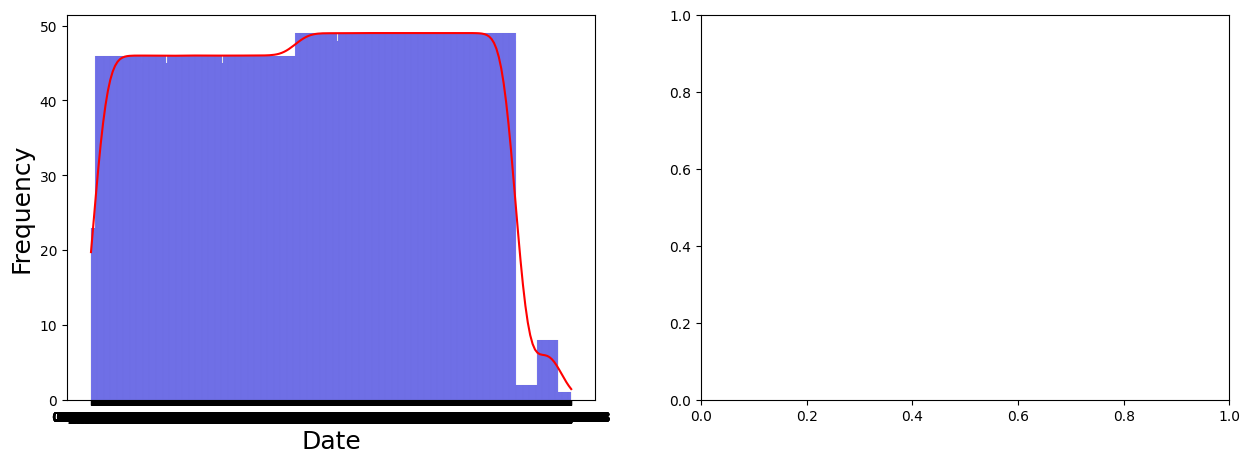

In [100]:
plot_histogram_and_statistics(data, data[categorical_columns(data)].columns)

In [99]:
# def print_all_statistics(df):
#     for column in df.columns:
#         stats = f"""
#         Column: {column}
#         Mean: {df[column].mean():.2f}
#         Median: {df[column].median():.2f}
#         Mode: {df[column].mode()[0]:.2f}
#         Std Dev: {df[column].std():.2f}
#         Variance: {df[column].var():.2f}
#         Skewness: {df[column].skew():.2f}
#         Kurtosis: {df[column].kurt():.2f}
#         """
#         print(stats)

# # Call the function
# print_all_statistics(data[numerical_columns(data)])

Obersaciones: 


• **Compuestas:** ¿Pueden tratarse para utilizarse en el problema a resolver?

imp






• Variables de entrada:
o Realizar los siguientes análisis por tipo de variable:
• Numéricas: Obtener conclusiones acerca de la distribución de los datos.
• Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada categoría, etc.
• Compuestas: ¿Pueden tratarse para utilizarse en el problema a resolver?
• Variables de salida (en caso de aplicar):
o ¿Están balanceadas las clases?
o (en caso de aplicar) ¿Qué técnicas consideraría para codificar la variable de salida? Justifique.

Categorical columns:
WindDir9am      10566 null values.    	 16 unique values.
WindGustDir     10326 null values.    	 16 unique values.
WindDir3pm      4228 null values.    	 16 unique values.
RainTomorrow    3267 null values.    	 2 unique values.
RainToday       3261 null values.    	 2 unique values.
Date            0 null values.    	 3436 unique values.
Location        0 null values.    	 49 unique values.
